<a href="https://colab.research.google.com/github/Steplos/_DATASCIEN-FOR-GEOSCIENTISTS/blob/main/Statistical_Geochemistry%2C_exploratory_data_analysis_of_compositional_data%2C_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Steplous Mpulubusi, mpulubusis@gamil.com.

# Introduction of compositional data




Geochemical analysis is used for different applications in geosciences. For example, in the geological sciences, we use geochemical data from rocks: the composition of sandstones to understand Earth processes. In environmental sciences, we use pollutant compositions to understand how natural processes or human impact cause pollutant variations.

These geochemical datasets share one same characteristic: they are compositional data, having the proportion or percentages of some whole. For example, if we measure geochemical concentrations in the lab, we often get **non-negative** concentrations, and report concentrations as a proportion: a percentage or parts per billion (ppb). If we add all components together, we will get **a constant sum**.

Compositional problems actually exist in many disciplines, more examples could be:

*   Nutrition compositions of food
*   Color compositions in painting
*   Household budget compositions: i.e. housing, food, clothing, transportation
*   Landuse compositions: i.e. industry, farmland, city, nature.
*   ...



In this notebook, we will learn why analyze compositional data using classical statistics is not appropriate and then how we can visualize and analyze the compositional data.

We will learn theory from practice: analyzing groundwater geochemistry data in Central Valley, California.

Reference: [A Concise Guide to Compositional Data Analysis, John Aitchison](http://www.leg.ufpr.br/lib/exe/fetch.php/pessoais:abtmartins:a_concise_guide_to_compositional_data_analysis.pdf)

## Groundwater geochemistry data in Central Valley

California’s central valley is one of the most productive agricultural regions of the world. Agricultural irrigation in these semi-arid agricultural regions heavily relys on the groundwater system. At the same time, with an increase in population, groundwater consumption is expected to increase. The result is that pumping from increasingly deeper parts of the aquifer has increased the rate of downward groundwater flow. This increasing gradient may enhance the concentration of geogenic contaminants, such as Chromium (Cr), Uranium (U) and Arsenic (As).


**Landuse map in Central Valley**



![landuse.jpg](https://drive.google.com/uc?export=view&id=1M62JIu9cKtztoxiWIMILUQ3yrkxobtF8)

Our objective in this chapter is to understand the underlying (bio)chemical processes or even human impact from available groundwater geochemistry data.  

Let's start to explore our dataset: \\
Data source: USGS GAMA Priority Basin Project, acquired in Feb. 2019.

In [1]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 793, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 793 (delta 69), reused 135 (delta 54), pack-reused 615 (from 1)
Receiving objects: 100% (793/793), 187.93 MiB | 8.64 MiB/s, done.
Resolving deltas: 100% (389/389), done.
Updating files: 100% (167/167), done.


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
# Load geochem dataset, groundwater chemistry in Central Valley
data = pd.read_csv('/content/DataScienceForGeosciences/Ch2_StatsGeochem/Datapoints-CentralValley-Groundwater-Jan2019.csv')

In [6]:
# prompt: import data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
# Author: Steplous Mpulubusi, mpulubusis@gamil.com.

# Clone data from our GitHub repository
!git clone https://github.com/lijingwang/DataScienceForGeosciences.git
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")
# Load geochem dataset, groundwater chemistry in Central Valley
data = pd.read_csv('/content/DataScienceForGeosciences/Ch2_StatsGeochem/Datapoints-CentralValley-Groundwater-Jan2019.csv')


fatal: destination path 'DataScienceForGeosciences' already exists and is not an empty directory.


FileNotFoundError: [Errno 2] No such file or directory: '/content/DataScienceForGeosciences/Ch2_StatsGeochem/Datapoints-CentralValley-Groundwater-Jan2019.csv'

In [ ]:
# preview the data
data.head()

,Latitude,Longitude,SOURCE,SOURCE.NAM,OTHER.NAME,WELL.ID,Al (ppb),As (ppb),Ba (ppb),Ca (ppb),...,Ni (ppb),NO3 (ppb),Pb (ppb),Se (ppb),SO4 (ppb),Sr (ppb),U (ppb),V (ppb),Zn (ppb),Cr_level
0,39.767667,-121.781556,USGS,CAMP-ES-15,CAMP-ES-15,CAMP-ES-15,2.6,0.79,8.62,17700,...,0.28,474,0.341,0.05,3410,135.0,0.117068,20.0,2.0,Group 0
1,37.757111,-120.799278,USGS,CE-QPC-01,CE-QPC-01,CE-QPC-01,6.6,1.20,43.10,24400,...,1.18,4390,2.690,0.05,7580,309.0,0.356680,7.0,26.1,Group 0
2,37.757111,-120.799278,USGS,CE-QPC-01,CE-QPC-01,CE-QPC-01,1.5,1.30,43.20,22800,...,0.20,4340,1.130,0.08,10500,316.0,0.307840,7.3,28.6,Group 0
3,38.287528,-121.328972,USGS,COS-08,COS-08,COS-08,3.4,21.90,154.00,9430,...,0.20,238,0.040,0.09,3450,115.0,0.156880,3.0,6.8,Group 0
4,38.287528,-121.328972,USGS,COS-08,COS-08,COS-08,1.3,21.50,152.00,9470,...,0.21,298,0.080,0.07,3080,126.0,0.281200,1.5,1.5,Group 0


Text(0.5, 1.0, 'As (ppb)')

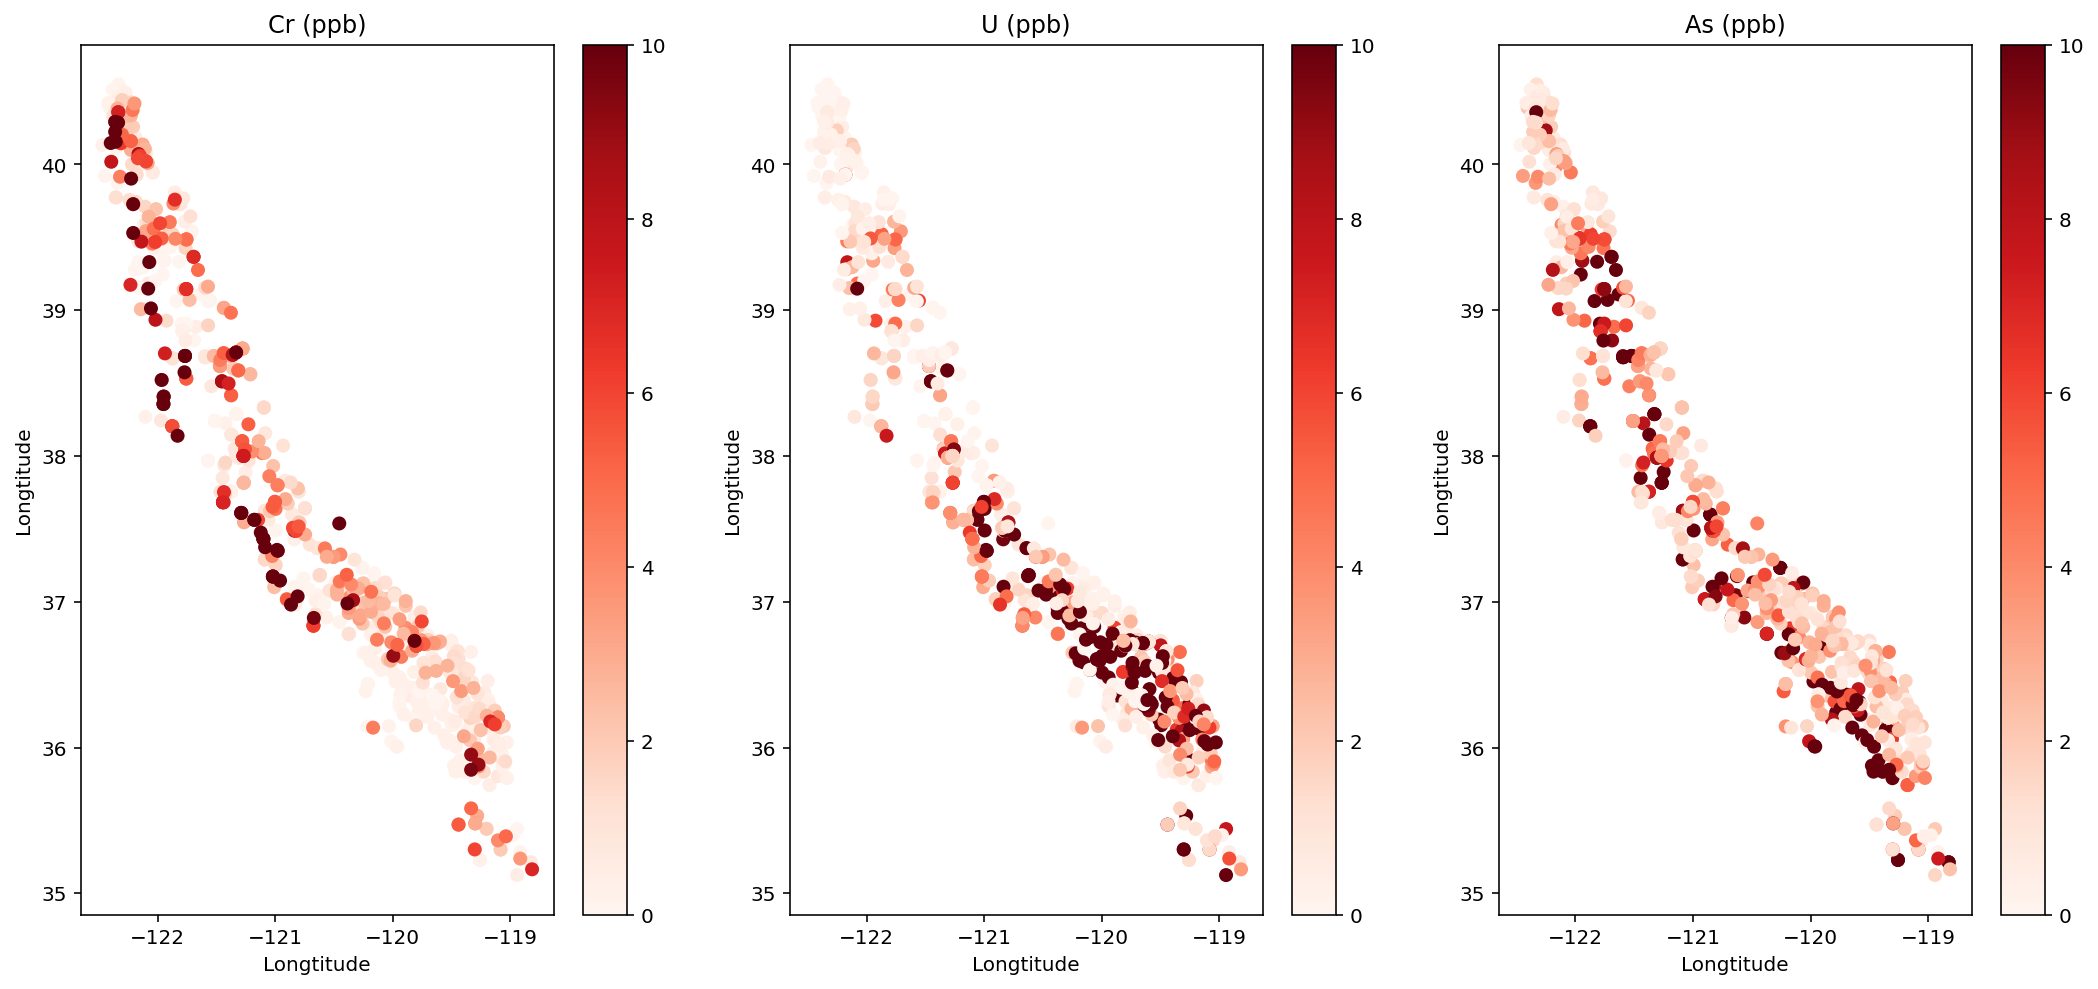

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))

plot1 = ax1.scatter(data['Longitude'],data['Latitude'],c = data['Cr (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot1,ax=ax1)
ax1.set_xlabel('Longtitude')
ax1.set_ylabel('Longtitude')
ax1.set_title('Cr (ppb)')
plot2 = ax2.scatter(data['Longitude'],data['Latitude'],c = data['U (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot2,ax=ax2)
ax2.set_xlabel('Longtitude')
ax2.set_ylabel('Longtitude')
ax2.set_title('U (ppb)')
plot3 =ax3.scatter(data['Longitude'],data['Latitude'],c = data['As (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot3,ax=ax3)
ax3.set_xlabel('Longtitude')
ax3.set_ylabel('Longtitude')
ax3.set_title('As (ppb)')

In practice, if we study the variation of these compositional data in multiple samples, we may be able to discover that one group of samples seems to be of very different composition than another group, indicating that they formed under different processes.

This maybe easy if we have only 2 or 3 different elements; it becomes much harder when you have 22 elements in our central valley case. We would like to understand the complex chemical interaction from available elements.

Then, let's start the true detective work!

# Compositional data analysis

## Negative bias problem
To understand the limitation of classical statistics on compositional data, let's first start with a very simple synthetic dataset, 3 soil samples, with 4 different compositions:





In [ ]:
soil_samples = {'animal': [0.1,0.2,0.3], 'vegetation': [0.2,0.1,0.3],
     'mineral':[0.1,0.1,0.2], 'water':[0.6, 0.6, 0.2]}
soil_samples = pd.DataFrame(data=soil_samples)

In [ ]:
soil_samples

,animal,vegetation,mineral,water
0,0.1,0.2,0.1,0.6
1,0.2,0.1,0.1,0.6
2,0.3,0.3,0.2,0.2


The elements in each sample sum up to 1 or a constant.
Let's plot the pairwise relationship in this dataset:

In [ ]:
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

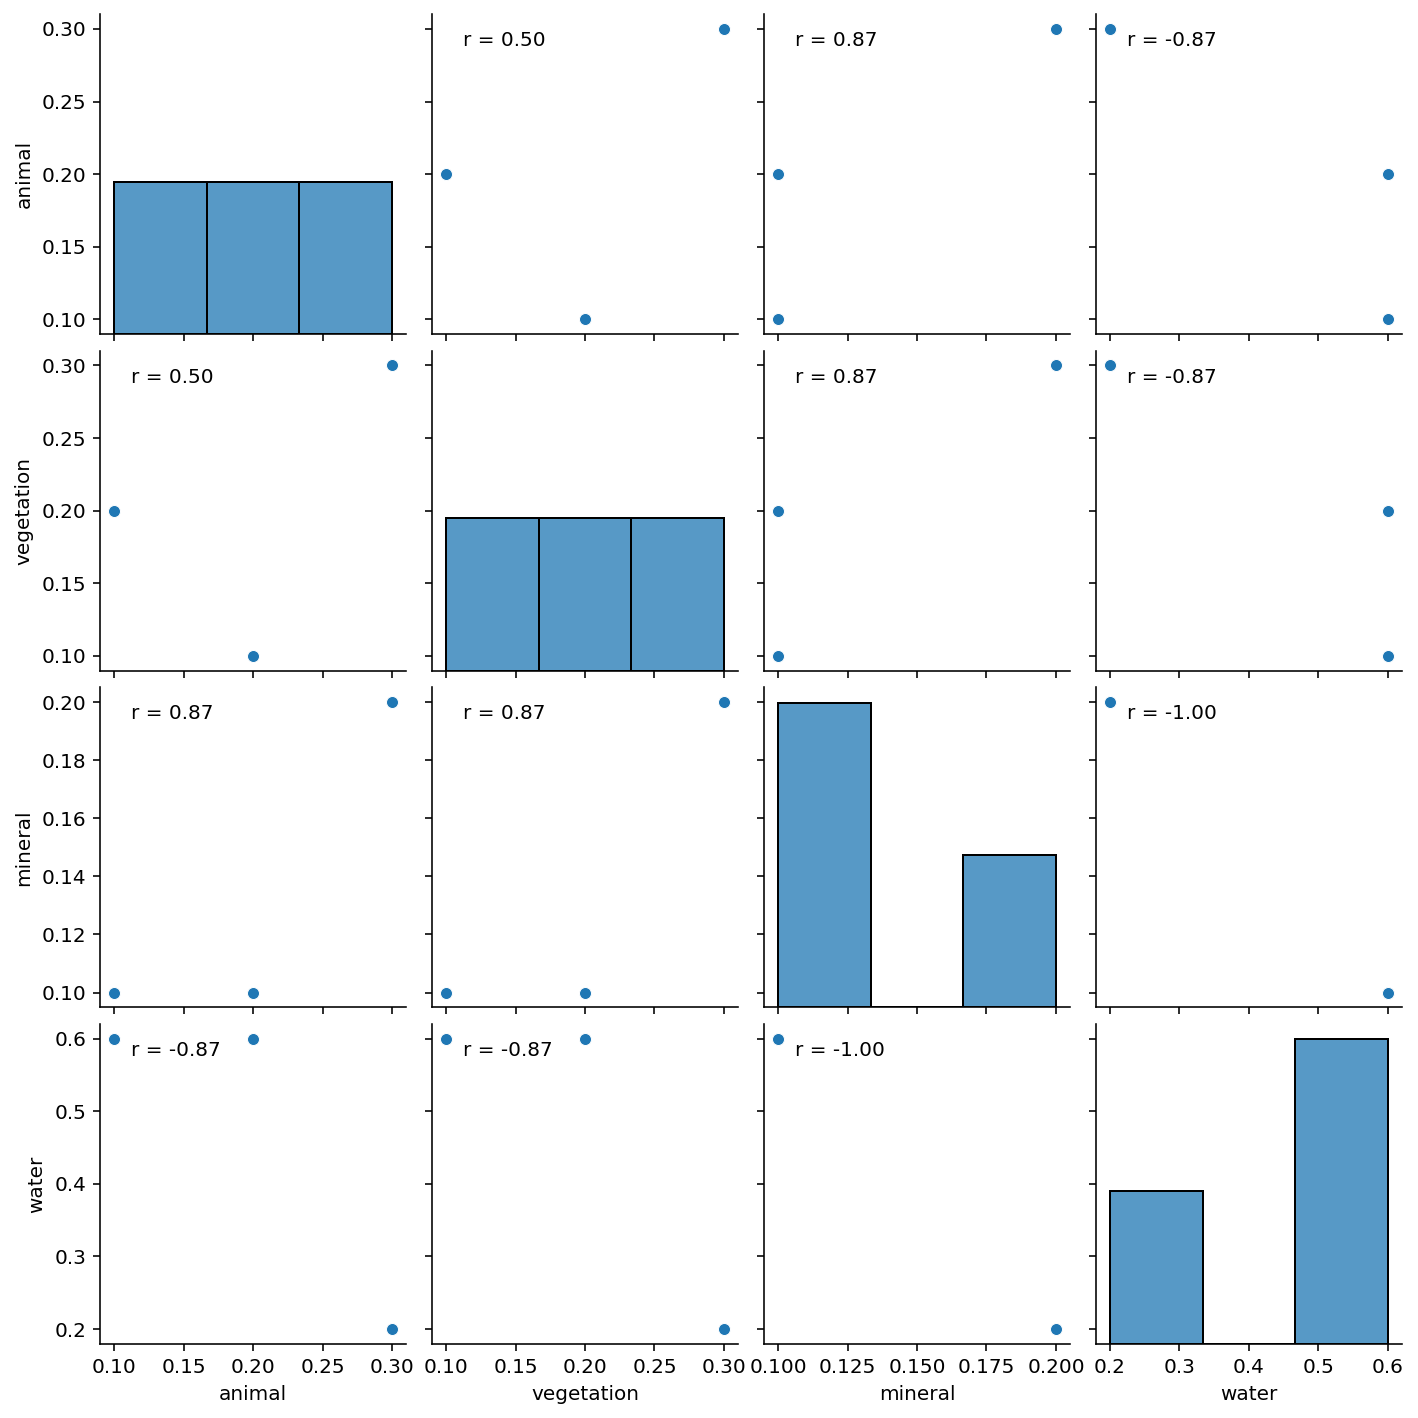

In [ ]:
import seaborn as sns

g = sns.pairplot(soil_samples, kind="scatter",diag_kind='hist')
g.map_upper(corrfunc)
g.map_lower(corrfunc)
plt.show()


We are interested the correlation between each composition:

Correlation $\rho_{X,Y}$ (Pearson correlation) between $X$ and $Y$:

$$\rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}$$

Empirically, we can estimate the correlation:

$$\hat{\rho}_{X,Y} = \frac{\sum_{i = 1}^n(x_i - \bar{x})(y_i - \bar{y}))}{\sqrt{\sum_{i = 1}^n(x_i - \bar{x})^2}\sqrt{\sum_{i = 1}^n(y_i - \bar{y})^2}}$$

where $\bar{x}, \bar{y}$ are sampled mean: $\bar{x} = \frac{1}{n}\sum_{i = 1}^n x_i$, $\bar{y} = \frac{1}{n}\sum_{i = 1}^n y_i$





In [ ]:
## correlation matrix
pd.DataFrame(data=np.corrcoef(soil_samples.values.T),
             index = soil_samples.columns,
             columns = soil_samples.columns)

,animal,vegetation,mineral,water
animal,1.000000,0.500000,0.866025,-0.866025
vegetation,0.500000,1.000000,0.866025,-0.866025
mineral,0.866025,0.866025,1.000000,-1.000000
water,-0.866025,-0.866025,-1.000000,1.000000


We can see many negative correlations between other compositions and water. Because all compositions sum to 1, more water means less other compositions.

However, this constant sum constraint means correlations are not free to range over the usual interval (-1,1). And there always exists spurious negative correlation between compositions. We couldn't trust these empirical correlation calculations between compositions.

Note here we calculate the correlation by only 3 samples. This is just to show the concept. In your own practice, please **do not** use small amount of samples to infer the correlation between two elements.

This above problem is described as the constant-sum problem or the negative bias problem in the literature.

If we have $D$ compositions $[x_1,...,x_D]$, and all compositions sum up to 1 or constant value, $x_1 + x_2 +...+ x_D = 1$, since:

$$\text{cov}(x_1 + x_2 +...+ x_D) = 0$$

Then we have:
$$\text{cov}(x_1,x_2)+...+\text{cov}(x_1,x_D) = -\text{var}(x_1)$$

$\text{var}(x_1)$ is always negative except for the trival case $x_1$ is constant.

Therefore, there is at least one negative covariance/correlation on the left side: $\text{cov}(x_1,x_2),...,\text{cov}(x_1,x_D)$. This spurious negative correlation may confuse the researchers' interpretation.

## Subcompositional incoherence

Another problem in compositional data analysis is the **subcompositional incoherence**:

Let's say the scientist dry (remove water) all soil samples and measure the composition again:

In [ ]:
soil_samples_dry = soil_samples.drop(['water'],axis = 1)
soil_samples_dry = pd.DataFrame(soil_samples_dry.values/np.sum(soil_samples_dry.values, axis = 1).reshape(-1,1))
soil_samples_dry.columns = ['animal','vegetable','mineral']

In [ ]:
soil_samples_dry

,animal,vegetable,mineral
0,0.250,0.500,0.25
1,0.500,0.250,0.25
2,0.375,0.375,0.25


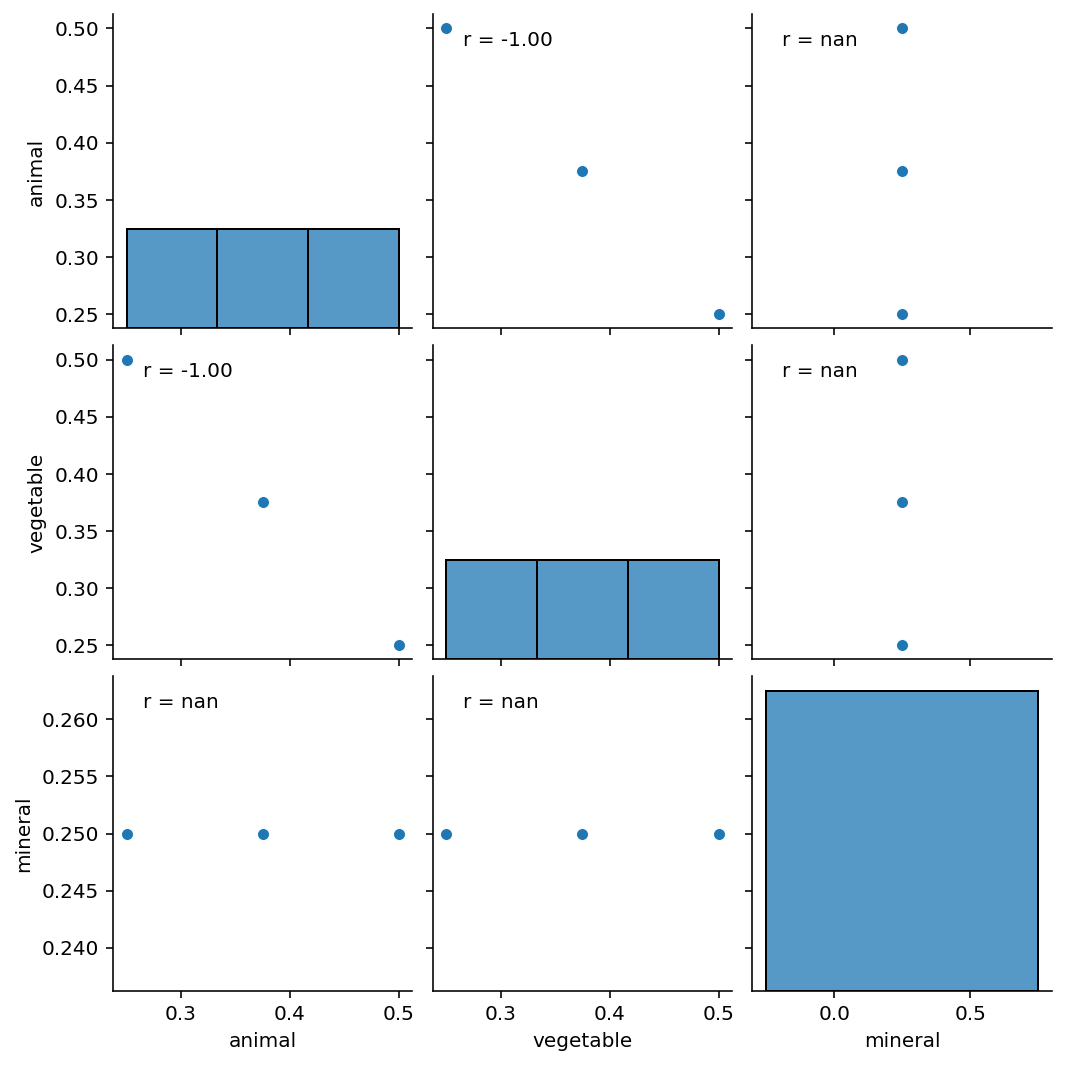

In [ ]:
g = sns.pairplot(soil_samples_dry, kind="scatter",diag_kind = 'hist')
g.map_upper(corrfunc)
g.map_lower(corrfunc)
plt.show()

In [ ]:
## correlation matrix
pd.DataFrame(data=np.corrcoef(soil_samples_dry.values.T),
             index = soil_samples_dry.columns,
             columns = soil_samples_dry.columns)

,animal,vegetable,mineral
animal,1.0,-1.0,NaN
vegetable,-1.0,1.0,NaN
mineral,NaN,NaN,NaN


Then surprisingly, the correlation between animal and vegetable compositions is **negative**! The correlation was positive when we have the water content. This **subcompositional incoherence** again confuses many geochemists in the compositional data analysis.

Note here NaN is because after drying process, the mineral composition is constant.



---



Let's go back to our central valley groundwater dataset and see if the similar confusion exists:

The unit for ions is ppb, parts-per-billion ($10^{-9}$). The quantity "1 ppb" can be used for mass fraction if a water-borne pollutant is present at one-billionth of a gram per gram of sample solution.

Then all existing elements should sum up to a constant 1,000,000,000 ppb. In our groundwater geochemical dataset, we are interested in 22 elements of all existing elements, excluding water or common nontoxic ions such as sodium ions.

Let's calculate the correlation between elements again, given all compositions and subcompositions:

1) all compositions: original data, use compositional data in ppb

2) subcompositions: standardized data by the summation of 22 elements, also means we measure composition within 22 elements

For example let's see the correlation between SO4 and Cr:

1) all compositions

Text(0.5, 1.0, 'Correlation 0.122')

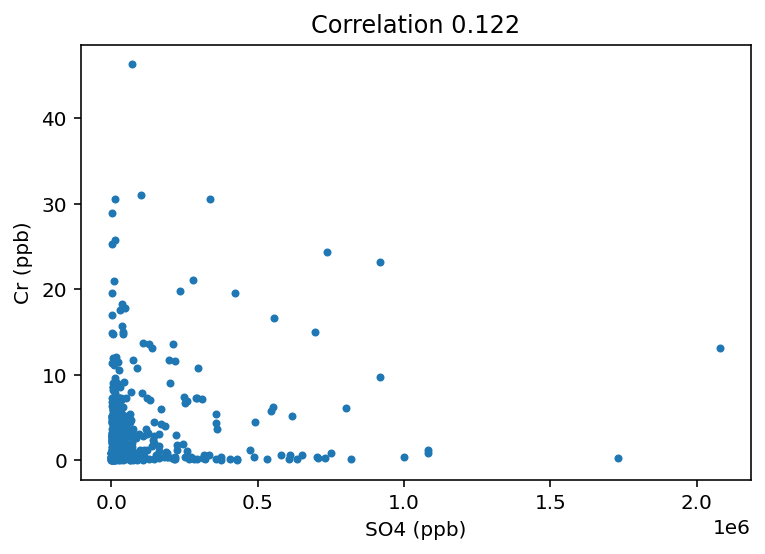

In [ ]:
plt.plot(data['SO4 (ppb)'],data['Cr (ppb)'],'.')
plt.xlabel('SO4 (ppb)')
plt.ylabel('Cr (ppb)')
plt.title('Correlation '+str(np.round(np.corrcoef(data['SO4 (ppb)'],data['Cr (ppb)'])[0,1],3)))

2) subcompositions

In [ ]:
# subcomposition, 22 elements, standardize by their summation
compositional_data = np.array(data.values[:,6:(6+22)],dtype = 'float64')
compositional_data_sub = pd.DataFrame(compositional_data/np.sum(compositional_data, axis = 1).reshape(-1,1))
compositional_data_sub.columns =  data.columns[6:(6+22)]

compositional_data = pd.DataFrame(compositional_data)
compositional_data.columns =  data.columns[6:(6+22)]

Text(0.5, 1.0, 'Correlation -0.245')

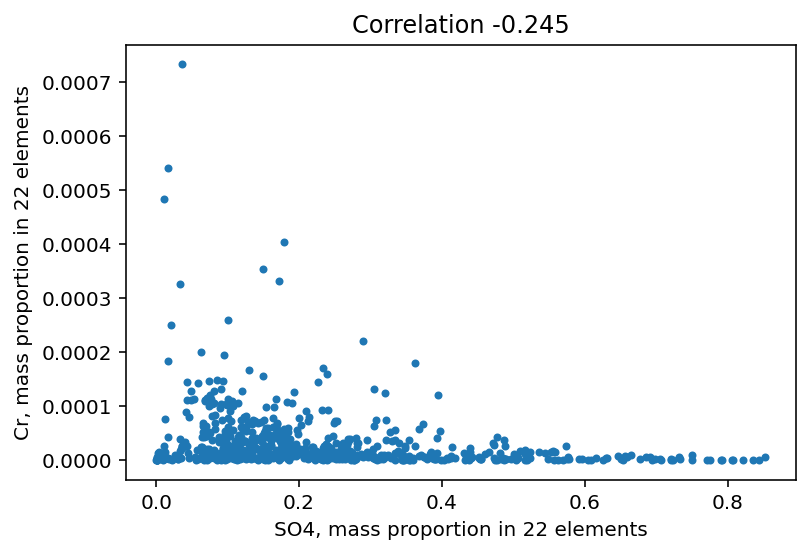

In [ ]:
plt.plot(compositional_data_sub['SO4 (ppb)'],compositional_data_sub['Cr (ppb)'],'.')
plt.xlabel('SO4, mass proportion in 22 elements')
plt.ylabel('Cr, mass proportion in 22 elements')
plt.title('Correlation '+str(np.round(np.corrcoef(compositional_data_sub['SO4 (ppb)'],compositional_data_sub['Cr (ppb)'])[0,1],3)))

So again we see these two correlations: one is positive and the other one is negative. This result is not subcompositional coherent.





---


Also the operation of sum (difference) and product in Euclidean distance is inappropriate.

For example, we have 2 solutions: one has 10 ppb of Cr and the other one also has 10 ppb of Cr. We can not add these relative proportions directly and say we have 20 ppb in our solution after mixing.

So how are we going to overcome negative bias problem? Achieve subcompositional coherence? Define a reasonable operation for compositional data? Let's start with an intuitive approach: ratios and log-ratios.

## An intuitive approach: log-ratios

Compositional data only provide information about the relative magnitudes of a constant total, not their absolute values. That means **compositional data essentially provides us the ratios of different elements**. So it seems to be reasonable to think about ratios.

In fact, if we have $D$ compositions $[x_1,...,x_D]$, and all compositions sum up to a constant,

$$x_1 + x_2 +...+ x_D = \text{Const}$$

we will only have $D-1$ random variables, means if we know $D-1$ among $[x_1,...,x_D]$, we will direcly know the rest of the component.



Therefore, $D-1$ ratios $\frac{x_1}{x_D}, \frac{x_2}{x_D}, ..., \frac{x_{D-1}}{x_D}$ also provide sufficient information of compositions.

Compositions are all non-negative values, between 0 and the constant sum. Let's assume our compositions are all positive for now. Treatment of zeros will be covered later in the notebook. Then ratios are now defined on $(0,\infty)$.

We are interested in the variance in our geochemical dataset. Variances indicate different underlying processes. So if we think about two ratios $\frac{x_i}{x_j}$ and $\frac{x_j}{x_i}$, they should both imply variance for composition $i$ and $j$. However, there is no exact relationship between $\text{var}(\frac{x_i}{x_j})$ and $\text{var}(\frac{x_j}{x_i})$.



**Why log-ratios?**

In order to expand compositions into the real number space $(-\infty,\infty)$ and address variance relationship, [Aitchison, 1982](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1982.tb01195.x) propose to use log-ratios $\log(\frac{x_i}{x_j})$:


$$\text{var}(\log(\frac{x_i}{x_j})) = \text{var}(\log(x_i)-\log(x_j)) = \text{var}(\log(x_j)-\log(x_i)) = \text{var}(\log(\frac{x_j}{x_i}))$$



Now $\log(\frac{x_i}{x_j})$ is defined on the real space $(-\infty,\infty)$. And there is a simple relationship on the variance of log-ratios.



Below are two cross plots: 1) classical scatter plot (restricted, 0 < x < constant sum) 2) log-ratio scatter plot (non restricted). If we would like to investigate the relationship between two components and confidence interval/region of scatter points, the first plot will not provide sufficient answers.



Text(0, 0.5, 'Cr (ppb)')

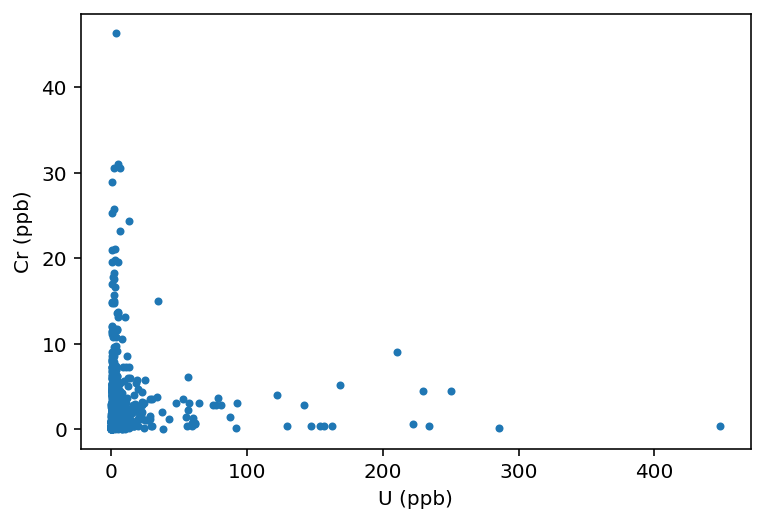

In [ ]:
plt.plot(data['U (ppb)'],data['Cr (ppb)'],'.')
plt.xlabel('U (ppb)')
plt.ylabel('Cr (ppb)')

Text(0, 0.5, 'log(Cr/SO4)')

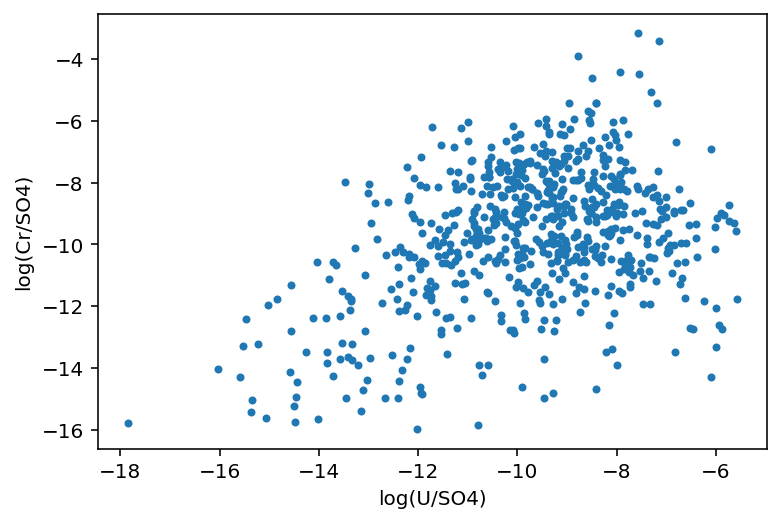

In [ ]:
plt.plot(np.log(data['U (ppb)']/data['SO4 (ppb)']),np.log(data['Cr (ppb)']/data['SO4 (ppb)']),'.')
plt.xlabel('log(U/SO4)')
plt.ylabel('log(Cr/SO4)')

We saw log-ratio is promising for representing relative information and variance of ratios. Can we then analyze the log-ratio data by the standard multivariate statistical method, such as mean or variance calculation?

Let's first introduce principles of compositional data and see if the log-ratio transformation satisfy these principles.

## Principles of compositional data




### Scale invariance

When we say we are dealing with the compositional problem, we should realize that the size of our samples does not matter. Then any statistical analysis or any meaningful function must be *invariant under the group of scale transformations.*

For example, if we have 3 different rock samples (sand, clay):
(0.75g, 0.15g),  (0.25g, 0.05g), (0.3g, 0.6g).




(0.0, 1.0)

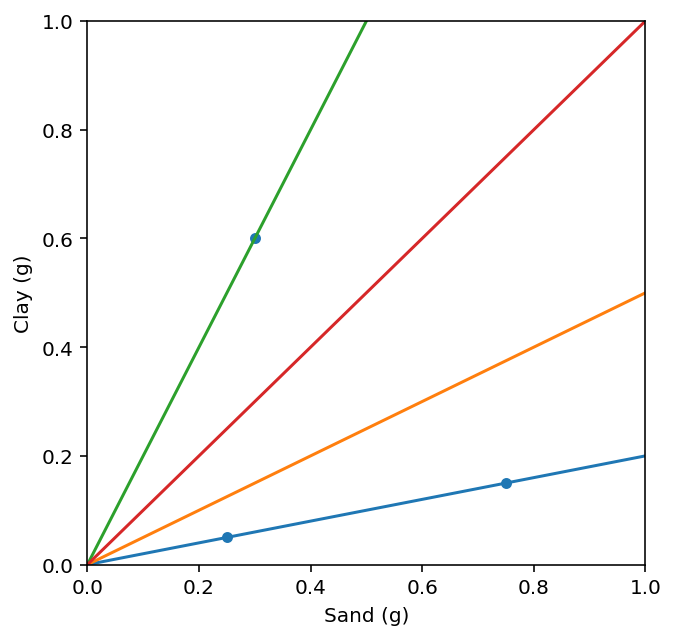

In [ ]:
rock_samples = np.array([[0.75,0.15],[0.25,0.05],[0.3,0.6]])
plt.figure(figsize = [5,5])
plt.scatter(rock_samples[:,0],rock_samples[:,1],s = 20)
plt.plot((0,1),(0,0.2))
plt.plot((0,1),(0,0.5))
plt.plot((0,1),(0,2))
plt.plot((0,1),(0,1))
plt.xlabel('Sand (g)')
plt.ylabel('Clay (g)')
plt.xlim(0,1)
plt.ylim(0,1)


The first two samples are of the same composition. Any samples on the same line are of the same composition. There is a scale relationship between any two points on the same line.

Therefore, we can define a rescale operation **closure** so that the sum of all components is $\kappa$.

**Closure**: for any compositional data with $D$ compositions $[x_1,...,x_D]$:

$$C([x_1,...,x_D]) = [\frac{\kappa * x_1}{\sum_{i = 1} ^D x_i},...,\frac{\kappa * x_D}{\sum_{i = 1} ^D x_i}]$$

Then if two samples **x,y** are compositional equivalent, C(**x**) = C(**y**)





Apparenetly, the closure of first two in rock samples are the same.

In our geochemistry dataset, we have already rescaled according to the unit ppb, then $\kappa = 1,000,000,000$.



**Scale invariant function $f$:**

For any $\lambda$ and any compositions $\textbf{x}$, if a function $f$:
$$f(\lambda \textbf{x}) = f( \textbf{x})$$
the function $f$ is scale equivalent.

Ratio and log-ratios are scale equivalent:
$\log(\frac{ x_i}{ x_j}) = \log(\frac{\lambda x_i}{ \lambda x_j})$

### Subcompositional coherence

Subcompositions means we only take several compositions among all elements. Subcompositional coherence means any relationships founded in subcompositions should be the same as in full compositions.




However, earlier in our notebook, we show that if we directly take compositions and calculate classical pearson correlation coefficient, the incoherence exists.

Ratios and log-ratios are the same and coherent in both subcompositions $[x_1, x_2, ..., x_s]$ and full compositions $[x_1, x_2, ..., x_D]$ .

$$\log(\frac{ x_i/\sum_{k = 1}^D x_k}{ x_j/\sum_{k = 1}^D x_k}) = \log(\frac{ x_i/\sum_{k = 1}^s x_k}{ x_j/\sum_{k = 1}^s x_k}) $$


Let's go back to our soil sample case: where we have sample with water, or without water.

In [ ]:
soil_samples

,animal,vegetation,mineral,water
0,0.1,0.2,0.1,0.6
1,0.2,0.1,0.1,0.6
2,0.3,0.3,0.2,0.2


In [ ]:
soil_samples_dry

,animal,vegetable,mineral
0,0.250,0.500,0.25
1,0.500,0.250,0.25
2,0.375,0.375,0.25


We plot the log-ratio log(animal/vegetable) for the above two compositional datasets. And we see the log-ratio value does not change no matter for full compositions or sub-compositions.

Text(0, 0.5, 'log(animal/vegetable), after drying')

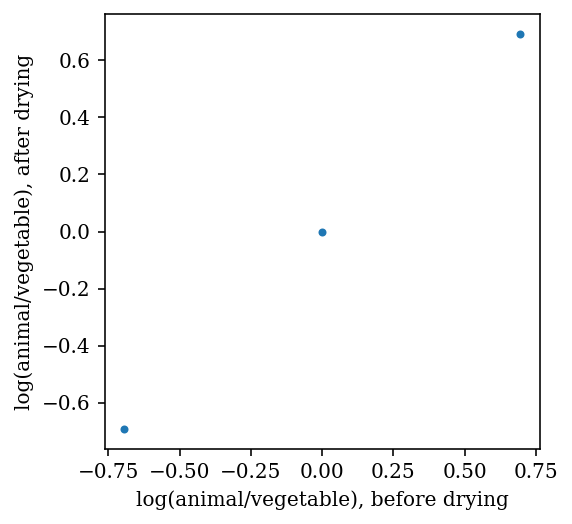

In [ ]:
plt.plot(np.log(soil_samples['animal']/soil_samples['vegetation']), np.log(soil_samples_dry['animal']/soil_samples_dry['vegetable']),'.')
plt.gca().set(aspect='equal')
plt.xlabel('log(animal/vegetable), before drying')
plt.ylabel('log(animal/vegetable), after drying')

We calculate the correlation coefficient between the log-ratio log(animal/mineral) and the log-ratio log(vegetable/mineral) for the above two compositional datasets. Because the log-ratio value does not change, our correlation coefficients are the same as well. We have no inconsistency after the log-ratio transformation.

Text(0.5, 1.0, 'Before drying, correlation = -0.98')

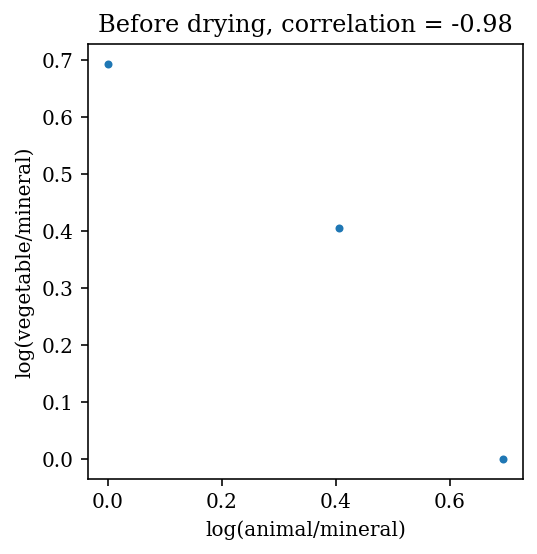

In [ ]:
plt.plot(np.log(soil_samples['animal']/soil_samples['mineral']), np.log(soil_samples['vegetation']/soil_samples['mineral']),'.')
corr = np.corrcoef(np.log(soil_samples['animal']/soil_samples['mineral']), np.log(soil_samples['vegetation']/soil_samples['mineral']))[0,1]
plt.gca().set(aspect='equal')
plt.xlabel('log(animal/mineral)')
plt.ylabel('log(vegetable/mineral)')
plt.title('Before drying, correlation = '+str(np.round(corr,2)))

Text(0.5, 1.0, 'After drying, correlation = -0.98')

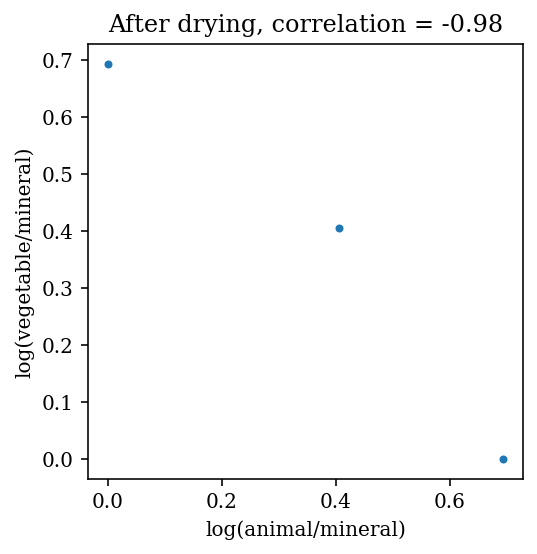

In [ ]:
plt.plot(np.log(soil_samples_dry['animal']/soil_samples_dry['mineral']), np.log(soil_samples_dry['vegetable']/soil_samples_dry['mineral']),'.')
corr = np.corrcoef(np.log(soil_samples_dry['animal']/soil_samples_dry['mineral']), np.log(soil_samples_dry['vegetable']/soil_samples_dry['mineral']))[0,1]
plt.gca().set(aspect='equal')
plt.xlabel('log(animal/mineral)')
plt.ylabel('log(vegetable/mineral)')
plt.title('After drying, correlation = '+str(np.round(corr,2)))

## Log-ratio transformation

There are 3 commonly used log-ratio tranformations. Different transformations have different advantages.

Suppose we have compositional data with $D$ compositions $x = [x_1,...,x_D]$:



In [ ]:

## load compositional data analysis package
! pip install scikit-bio
from skbio.stats.composition import *
## compositional data from geochemical dataset
compositional_data = np.array(data.values[:,6:(6+22)],dtype = 'float64')
columns_name = data.columns[6:(6+22)]
## closure
closure_result = pd.DataFrame(data = closure(compositional_data), columns = [('c(')+str(name)+')' for name in columns_name])

     |████████████████████████████████| 8.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.5.7-cp37-cp37m-linux_x86_64.whl size=2147400 sha256=13ea746591e0244cd45c5bf0390af9788b3e62647f66892e37aaf205345e852b
  Stored in directory: /root/.cache/pip/wheels/1f/62/74/26fe0d34ceff9bf8a381ef629d9156e47138641c1751452422
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp37-cp37m-linux_x86_64.whl size=454912 sha256=c4ba37fadd6ceb5665afc05d21695f6efaadad68ca9defe59c7da134549a0f8a
  Stored in directory: /root/.cache/pip/wheels/56/5d/28/fb40426fbf6a8c3af88376a227130bbdf81e00177123e1398e
Successfully built scikit-bio hdmedians


ImportError: ignored

### alr: additive log-ratio transformation







$$y = \text{alr}(x) = \log(\frac{x_1}{x_D}, \frac{x_2}{x_D}, ..., \frac{x_{D-1}}{x_D})$$
$$y_i = \log(\frac{x_i}{x_D}), i = 1, ..., D - 1$$

*   $D - 1$ independent components
*   Assymetric, need to choose one $x_D$
*   Not permutation invariant, because of the choice $X_D$
*   Scale invariant
*   Subcompositional coherent, if we have $x_D$ in the subcomposition

In [ ]:
def alr(data, columns_name, choice_D = -1):
    # choice D: default = -1, the last component
    alr_result = np.log(data/data[:,choice_D].reshape(-1,1))
    name_D = columns_name[choice_D]
    columns_name = np.delete(columns_name,choice_D,0)
    alr_result = pd.DataFrame(data = np.delete(alr_result, choice_D, 1), columns = [('log(')+str(name)+'/'+str(name_D)+')' for name in columns_name])
    return alr_result

In [ ]:
alr_result = alr(compositional_data, columns_name)

In [ ]:
alr_result

### clr: centered logratio transformation, centered by geometric mean

$$y = \text{clr}(x) = \log(\frac{x_1}{g(x)}, \frac{x_2}{g(x)}, ..., \frac{x_{D}}{g(x)})$$
$$y_i = \log(\frac{x_i}{g(x)}), i = 1, ..., D$$
$$\sum_{i = 1}^D y_i = 0$$

$g(x)$ is the geometric mean
$$g(x) = (\prod _{i = 1}^D x_i)^{\frac{1}{D}}$$

*   $D$ components, collinearity exists
*   Symmetric
*   Permutation invariant
*   Scale invariant
*   Subcompositional incoherent, because the geometric mean $g(x)$ changes.



In [ ]:
clr_data = clr(compositional_data)
clr_data = pd.DataFrame(clr_data, columns = ['clr('+str(name) + ')' for name in columns_name])

In [ ]:
clr_data

### [Advanced] ilr: isometric log-ratio transformation







$$y = \text{ilr}(x) = [<x,e_1>,...,  <x,e_{D-1}>]$$
where $[e_1, ..., e_{D-1}]$ is the orthonormal basis for $D-1$ independent vector spaces.


*  $D - 1$ independent components
*  Symmetric
*  Construct $D-1$ orthonormal basis: $e_1, e_2, ..., e_{D-1}$
*  Isometric: preserve distances

Reference: [Isometric Logratio Transformations for Compositional Data Analysis](https://link.springer.com/article/10.1023/A:1023818214614)



In [ ]:
ilr_data = ilr(compositional_data)
ilr_data = pd.DataFrame(ilr_data, columns = ['ilr_'+str(name) for name in np.arange(compositional_data.shape[1]-1)])

In [ ]:
ilr_data

Note that here ilr transformation has great geometric properties. But each transformed variable is not easy to be related to the original component.

### Treatment of zeros

We are dealing with ratios and log-ratios. Both of them are not applicable to zero elements.

Hence we discuss how to treat zeros in compositional data analysis.



*   Case 1: the part with zeros is not important for the study → the part should be omitted.
We remove the nonessential components with zeros, or combine them with other zero free components.

*   Case 2: the part is important, the zeros are essential, not because the sensitivity of instrument → divide the sample into two or more groups according to the presence/absence of zeros, so that each group has no essential zero

*   Case 3: the part is important, the zeros are rounded zeros: the composition is really small, couldn't be detected by instrument. → use imputation techniques, replace by small values.


## Operations of compositional data: Perturbation and Powering




**Perturbation $\oplus$:**

Suppose in a sediment, we have compositions $x = (\text{sand, silt, clay})$, $x = (0.7, 0.1, 0.2)$. There is an erosional process. After erosion, the left proportions of each element are y = (0.8, 0.9, 1). This can be interpreted in the following way: no additional clay has been brought in ($y_3 = 1$), 20% of sand has been eroded away $y_1 = 0.8$.

Now you collect the eroded sample. What would be the composition of (sand, silt, clay)?






The original composition has been "perturbed" by an erosion process. Therefore, we introduce a new operation, perturbation, to obtain the current compositions:

$$x \oplus y = C([x_1y_1, ..., x_Dy_D])$$





In [ ]:
x = [0.7, 0.1, 0.2]
y = [0.8, 0.9, 1]
print('Current compositions after perturbation: '+str(perturb(x,y)))

**Powering $\odot$:**

If we perturb $x$ by $y$, and the same erosion happens many times $t$. Similar to sum (difference) and product in Euclidean distance, we define a product of perturbation, powering:

$$\underbrace{ y\oplus  ... \oplus y}_t = t \odot y = C[y_1^t,y_2^t ,..., y_D^t]$$




And it is very clear why this operation is called powering.

In [ ]:
x = [0.7, 0.1, 0.2]
y = [0.8, 0.9, 1]
print('Current compositions after 3 times perturbation: '+str(perturb(x, power(y,3))))

These two operations provide how compositions change after the natural process.

# CoDaPack, exploratory data analysis:

In this section, we introduce a software: **CoDaPack**, developed by [Compositional Data Analysis Group in University of Girona](http://ima.udg.edu/Recerca/EIO/inici_eng.html). CoDaPack is a stand alone compositional data analysis software, available for Windows or Mac or any platform with Java.

**Download and installation of CoDaPack**:

We recommend you to download and install from this website: http://ima.udg.edu/codapack/

More detailed manual can be accessed here:

*   [CoDaPack 2.0: a stand-alone, multi-platform compositional software](http://congress2.cimne.com/codawork11/Admin/Files/FilePaper/p28.pdf)
*   [CoDaPack v2 USER’s GUIDE](http://ima.udg.edu/codapack/assets/codapack-manual.pdf)



In our notebook, we will concisely cover how to use CoDaPack to obtain summary statistics and visualize through various plots.

Please download dataset from https://github.com/lijingwang/GEOLSCI6_EARTHSYS100A/blob/main/StatsGeochem/Datapoints-CentralValley-Groundwater-Jan2019.csv and load the data in to CoDaPack.





---


Recall we introduce the pairwise scatter plot for the multivariate compositional dataset. We are able to analyze scatter plot and correlation with 2 or 3 elements. But what if now we analyze the geochemistry data with 22 elements? Is there a better way to visualize the multivariate dataset?


In [ ]:
compositional_data = pd.DataFrame(compositional_data)
compositional_data.columns =  data.columns[6:(6+22)]
g = sns.pairplot(compositional_data[compositional_data.columns[0:8]], kind="scatter",diag_kind = 'hist')
g.map_upper(corrfunc)
g.map_lower(corrfunc)
plt.show()


Let's introduce some advanced EDA tools:
*   Ternary diagrams: looking at three things at the same time.
*   Bi-plot: looking at multiple elements at the same time in a 2D plot.

## Ternary Diagrams

Ternary diagram is a triangle plot, often uses for compositional data plotting. Each of the apexes is representing a composition.

Let's start with an example and see how to read a ternary diagram.

In [ ]:
ternary_example = pd.DataFrame(data = np.array([[1/3, 1/3, 1/3],
                                        [0.3,0.4,0.3],
                                        [0.2,0.6,0.2],
                                        [0.4,0.4,0.2],
                                        [0.6,0.2,0.2]]),
                      columns = ['A','B','C'])

In [ ]:
ternary_example

In [ ]:
import plotly.express as px
fig = px.scatter_ternary(ternary_example, a="A", b="B", c="C")
fig.show()

Let's concentrate on composition $A$. Composition $A = 1  = 100 \%$ is at the top point. Composition $A = 0 = 0 \%$ is all the points along line $BC$. Other compositions can be represented in between $A = 0$ and $A = 1$, proportional to the vertical distance to line $BC$.

You can put your mouse on the points of the above interactive plot, and see the values of composition $A, B, C$.

![ternary_explain.jpg](https://drive.google.com/uc?export=view&id=1pjkfyT2hKi7oC468wt4D6ky0Tld3xvuO)

Reference: [Reading a Ternary Diagram And Creating Rock Names ](http://csmgeo.csm.jmu.edu/geollab/fichter/sedrx/readternary.html#:~:text=A%20ternary%20diagram%20is%20a,A%2C%20B%2C%20and%20C.)



Similar to $A$, composition $B = 1 = 100\%$ is at the left vertex, $B = 0 = 0\%$ is on the points along line $AC$. We can draw a perpendicular line from vertex $B$ to line $AC$, and define $B$ composition between $0\%$ and $100\%$.

Composition $C = 1 = 100\%$ is at the right vertex, $C = 0 = 0\%$ is on the points along line $AB$. We can draw a perpendicular line from vertex $C$ to line $AB$, and define $C$ composition between $0\%$ and $100\%$.

Center of the ternary plot is $[1/3,1/3,1/3]$.

Within this ternary diagram, we can represent all compositions for $A,B,C$.



Are you able to read ternary diagrams now? Here we help you understand better through coloring all samples by different compositions.

In [ ]:
## color by compositions
fig = px.scatter_ternary(ternary_example, a="A", b="B", c="C", color = 'A')
fig.show()
fig = px.scatter_ternary(ternary_example, a="A", b="B", c="C", color = 'B')
fig.show()
fig = px.scatter_ternary(ternary_example, a="A", b="B", c="C", color = 'C')
fig.show()

Note that in ternary diagram, compositions are represented by composition after the closure operation, sumed up to 1 or 100%. Therefore, if we multiply our example datasets by 10, the ternary diagram will remain the same.

In [ ]:
ternary_example = pd.DataFrame(data = ternary_example.values*10,
                      columns = ['A','B','C'])

In [ ]:
import plotly.express as px
fig = px.scatter_ternary(ternary_example, a="A", b="B", c="C",color = 'A')
fig.show()



---


In CoDaPack, you can plot ternary diagram through **Graph -> Ternary/Quaternary plot**.




![ternary_coda.jpg](https://drive.google.com/uc?export=view&id=1UmMsuxz4-Mm2hjVfOJJYkxF5crXBK76R)

Let's say we select 3 elements from our geochemical dataset: Fe, Mn, NO3 as a subcomposition, and plot samples color by the level of Chromium (Cr).


*   Group 0: 0 ppb < [Cr] < 1 ppb
*   Group 1: 1 ppb < [Cr] < 2.5 ppb
*   Group 2: 2.5 ppb < [Cr] < 5 ppb
*   Group 3: 5 ppb < [Cr] < 10 ppb
*   Group 4:   [Cr] > 10 ppb

![ternary1.jpg](https://drive.google.com/uc?export=view&id=1-eYDtVjpGSldgxIGIkw3j1KQJtLjk-FX)

We can see higher NO3 (ppb) composition seems fall together with higher Cr(ppb). However, samples are clustered at high NO3 composition. Can we re-center and standardize this plot for better visualization?

## Center and variability


### Center and Centered Ternary diagram

What is the center of a compositional dataset? In classical statistics, the center is essentially the **arithmetic mean** of all samples. Does that also apply to the compositional data? How about the **geometric mean**?


\# samples: $N$

Closure of arithemtic mean :
$$C[\sum_{j = 1}^Nx_{1j},\sum_{j = 1}^Nx_{2j},..., \sum_{j = 1}^Nx_{Dj}]$$

Closure of geometric mean :
$$C[(\prod_{j = 1}^Nx_{1j})^{\frac{1}{N}},(\prod_{j = 1}^Nx_{2j})^{\frac{1}{N}},..., (\prod_{j = 1}^Nx_{Dj})^{\frac{1}{N}}]$$


Closure here is to make sure compositions have the same constant sum after any calculation.

Let's start with an example dataset, where $\log(A/C)$ and $\log(B/C)$ has linear relationship:

In [ ]:
center_example = closure(np.array([np.exp(np.arange(-1,1,0.1)),
                                np.exp(np.arange(-1,1,0.1)*2-1),
                                np.ones(20)]).T)

center_example = pd.DataFrame(data = center_example,
                              columns = ['A','B','C'])

In [ ]:
from scipy.stats.mstats import gmean
g_mean = closure(gmean(center_example.values))
a_mean = np.mean(center_example.values,axis = 0)

In [ ]:
plt.plot(np.log(center_example['A']/center_example['C']),
         np.log(center_example['B']/center_example['C']),'.')
plt.plot(np.log(g_mean[0]/g_mean[2]),
         np.log(g_mean[1]/g_mean[2]),'.',label = 'geometric mean')
plt.plot(np.log(a_mean[0]/a_mean[2]),
         np.log(a_mean[1]/a_mean[2]),'.',label = 'arithmetic mean')
plt.xlabel('log(A/C)')
plt.ylabel('log(B/C)')
plt.legend()

In [ ]:
from scipy.stats.mstats import gmean
center_example = np.vstack((center_example.values,
                       g_mean,
                       a_mean))
center_example = pd.DataFrame(data = center_example,
             columns = ['A','B','C'])
center_example['label'] = ['data']*20+['geometric mean']+['arithmetic mean']
fig = px.scatter_ternary(center_example, a="A", b="B", c="C", color = 'label')
fig.show()

Arithmetic mean deviates from the original dataset and is more like an outlier. **Geometric mean** is within the compositional dataset, in the center of ternary plot and log-ratio plot. Therefore, the closure of geometric mean becomes the **center** of a compositional dataset.

Therefore, we can calculate the empirical center using geometric mean, and center our ternary plot to have a more informative visualization. In CoDaPack, just click *centered*:

![ternary1.jpg](https://drive.google.com/uc?export=view&id=1PM6naOzARXvANMFmiFm-ptujY62Xl0-c)


In fact, in the log-ratio space, we can visualize log(NO3/Fe) against log(Cr/Fe):

In [ ]:
plt.plot(np.log(data['NO3 (ppb)']/data['Fe (ppb)']),
         np.log(data['Cr (ppb)']/data['Fe (ppb)']),'.')
plt.gca().set(aspect='equal')
plt.xlabel('log(NO3/Fe)')
plt.ylabel('log(Cr/Fe)')

In Ternary Diagram, we just pick 3 elements out of 22 elements as the subcomposition. How do we pick elements? How do we pick elements with large variance to investigate the variation of natural process? Let's learn the variance of the compositional data.

### Variation array

Here we define the variation array with the expectation and variance of log-ratios. Log-ratios are subcompositional coherent. Therefore, it will help us pick the subcomposition:

Estimate below the diagonal are $E(\log(X_i/X_j))$, and above the diagonal are $\text{Var}(\log(X_i/X_j))$



![variation_array.jpg](https://drive.google.com/uc?export=view&id=114JNhyA2CpAJunNPnxWVBNSrNtJHAOsD)

It is assumed that the logarithm of the logratio variances follow a t-student distribution, then:


*   dark blue colores variances below 5 percentile
*   light blue from 5 to 25 percentile
*   light red form 75 to 95 percentile
*   dark red above 95 percentile

So Fe, Mn, NO3 elements have high log-ratios variances.

Can you pick other elements and then plot ternary diagrams?

## Biplot
Suppose we have a multivariate matrix N x D:

*   N is the number of samples
*   D is the number of variables, or in our case, the number of compositions.


Biplot aims to plot samples and variables on the same plot. It is basically a scatter plot. Samples are displayed as points while variables are displayed as vectors.



### Standardization





In [ ]:
bivariate = np.random.multivariate_normal(np.array([2,3]), np.array([[1, 1.5], [1.5, 5]]), 100)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
matplotlib.rcParams.update({'font.size': 22})

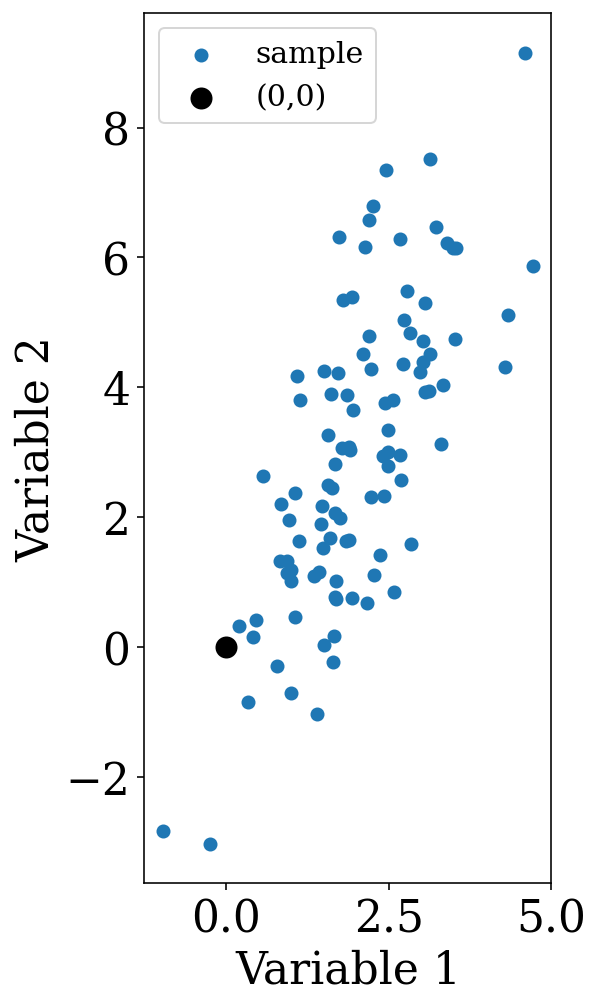

In [ ]:
plt.figure(figsize = [8,8])
plt.scatter(bivariate[:,0],bivariate[:,1],label = 'sample')
plt.scatter(0,0,color = 'black',zorder = 20,s = 100, label = '(0,0)')
plt.gca().set(aspect='equal')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend(fontsize = 15)

*   Center

Subtract the empirical mean

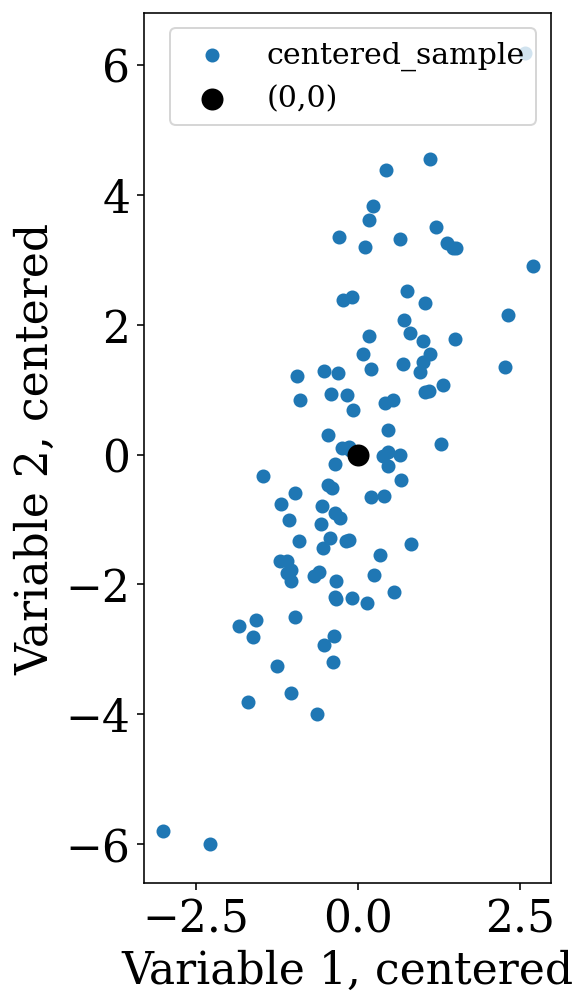

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=False)
centered_bivariate =  scaler.fit_transform(bivariate)

plt.figure(figsize = [8,8])
plt.scatter(centered_bivariate[:,0],centered_bivariate[:,1],label = 'centered_sample')
plt.scatter(0,0,color = 'black',zorder = 20,s = 100, label = '(0,0)')
plt.gca().set(aspect='equal')
plt.xlabel('Variable 1, centered')
plt.ylabel('Variable 2, centered')
plt.legend(fontsize = 15)

*   Scale

Divided by the empirical standard deviation

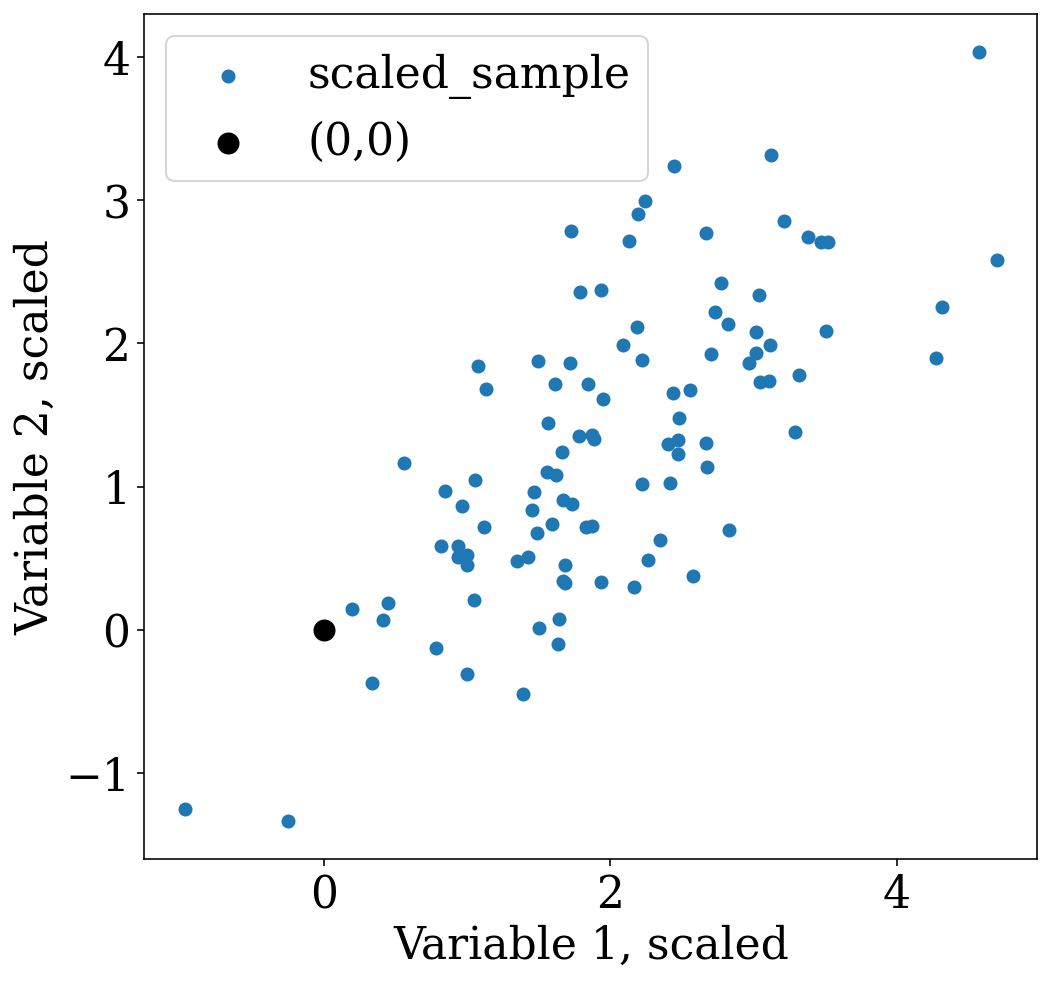

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaled_bivariate =  scaler.fit_transform(bivariate)

plt.figure(figsize = [8,8])
plt.scatter(scaled_bivariate[:,0],scaled_bivariate[:,1],label = 'scaled_sample')
plt.scatter(0,0,color = 'black',zorder = 20,s = 100, label = '(0,0)')
plt.gca().set(aspect='equal')
plt.xlabel('Variable 1, scaled')
plt.ylabel('Variable 2, scaled')
plt.legend()

*  Standardization

Center and Scale

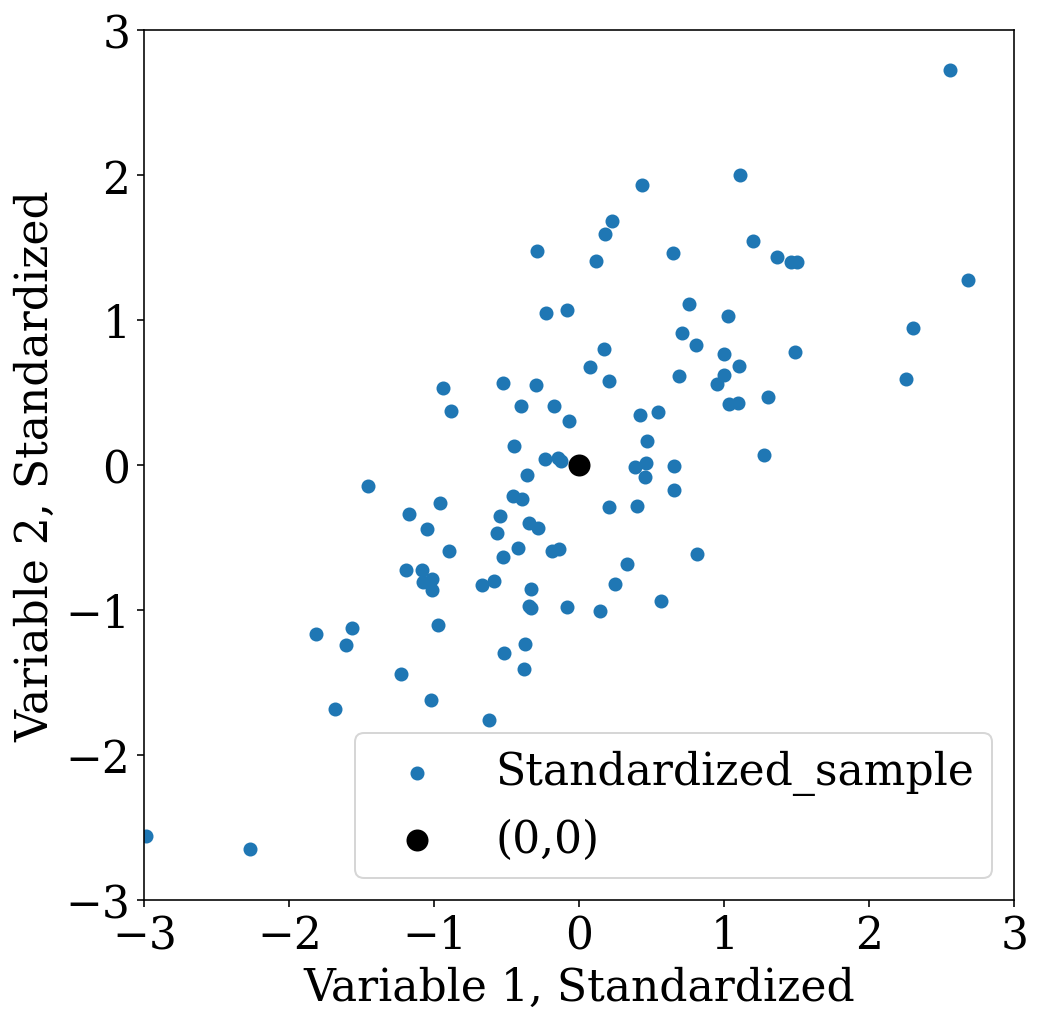

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_bivariate =  scaler.fit_transform(bivariate)

plt.figure(figsize = [8,8])
plt.scatter(standardized_bivariate[:,0],standardized_bivariate[:,1],label = 'Standardized_sample')
plt.scatter(0,0,color = 'black',zorder = 20,s = 100, label = '(0,0)')
plt.gca().set(aspect='equal')
plt.xlabel('Variable 1, Standardized')
plt.ylabel('Variable 2, Standardized')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend()

### Bivariate Gaussian example

Let's start with a synthetic 2D case, bivariate Gaussian example. Note that this example is bivariate, not compositional data.  We can simply use scatter plot to investigate the correlation between two variables:

In [ ]:
##bivariate_Gaussian = np.random.multivariate_normal(np.array([2,3]), np.array([[1, 1.5], [1.5, 5]]), 100)
bivariate_Gaussian = np.copy(bivariate)

Text(0, 0.5, 'Variable 2')

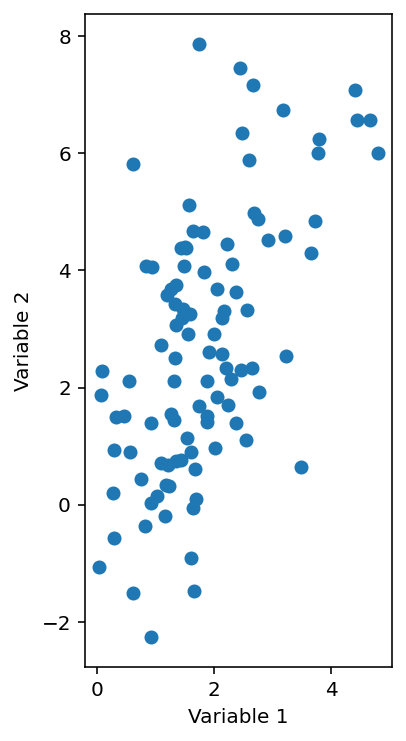

In [ ]:
plt.figure(figsize = [6,6])
plt.scatter(bivariate_Gaussian[:,0],bivariate_Gaussian[:,1])
plt.gca().set(aspect='equal')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

There are N = 100 samples in this scatter plot. These two variables have a linear relationship between each other. Can we rotate our axis to visualize two variables so that 1) variables after rotation are linearly uncorrelated 2) first axis explains maximum possible variance?



*   Original data after centering, removing the arithemtic mean: $X$, is a N x D matrix
*   Rotation matrix: $W$, is a D x D matrix
*   Coordinates/scores after rotation: $T = XW $, is a N x D matrix






In [ ]:
scaler = StandardScaler(with_std=False)
centered_bivariate =  scaler.fit_transform(bivariate_Gaussian)
std_bivariate = np.std(bivariate_Gaussian,axis = 0)

## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(bivariate_Gaussian)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In this biplot, we have rotated the original scatter plot, and maximize the variance along the new x-axis. The new axis represents coordinates/scores after rotation:

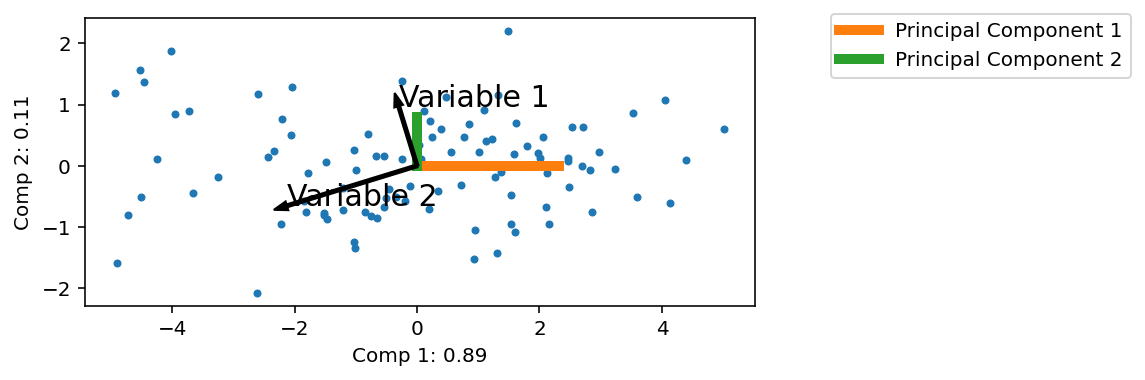

In [ ]:
# biplot for 2 variables, plot in principal component space
plt.figure(figsize=[6,6])
pc_scores = pca.transform(bivariate_Gaussian)
plt.plot(pc_scores[:,0],
         pc_scores[:,1],'.')

plt.plot([0, np.sqrt(pca.explained_variance_[0])], [0, 0], linewidth=5,
          color=f"C{1}", label=f"Principal Component {1}")

plt.plot([0, 0], [0, np.sqrt(pca.explained_variance_[1])], linewidth=5,
          color=f"C{2}", label=f"Principal Component {2}")

plt.arrow(0, 0,  pca.components_[0,0]*std_bivariate[0],pca.components_[1,0]*std_bivariate[0], width = 0.05,
          color='black',zorder = 2)

plt.text(pca.components_[0,0]*std_bivariate[0],pca.components_[1,0]*std_bivariate[0], 'Variable 1', size = 15, zorder = 20)

plt.arrow(0, 0, pca.components_[0,1]*std_bivariate[1],pca.components_[1,1]*std_bivariate[1], width=0.05,
         color='black',zorder = 2)

plt.text(pca.components_[0,1]*std_bivariate[1],pca.components_[1,1]*std_bivariate[1], 'Variable 2', size = 15)

plt.gca().set(aspect='equal')
plt.xlabel('Comp 1: '+str(np.round(pca.explained_variance_ratio_[0],2)))
plt.ylabel('Comp 2: '+str(np.round(pca.explained_variance_ratio_[1],2)))

plt.legend(bbox_to_anchor=(1.1, 1.05))

We can also compare the emprical covariance matrix:




In [ ]:
## Empirical covariance matrix, before rotation
pd.DataFrame(data=np.round(np.cov(bivariate_Gaussian.T),4),
             index = ['Variable 1','Variable 2'],
             columns = ['Variable 1','Variable 2'])

,Variable 1,Variable 2
Variable 1,1.0492,1.3371
Variable 2,1.3371,4.9873


In [ ]:
## Empirical covariance matrix, after rotation
pd.DataFrame(data=np.round(np.cov(pc_scores.T),4),
             index = ['Comp 1','Comp 2'],
             columns = ['Comp 1','Comp 2'])

,Comp 1,Comp 2
Comp 1,5.3983,-0.0000
Comp 2,-0.0000,0.6382


We empirically test that 1) variables after rotation are linearly uncorrelated and 2) first axis explains maximum possible variance: 6.08 or maximum possible variance ratio 6.08/(6.08+0.59) = 91% .

We can also view this rotated axis in the original scatter plot:

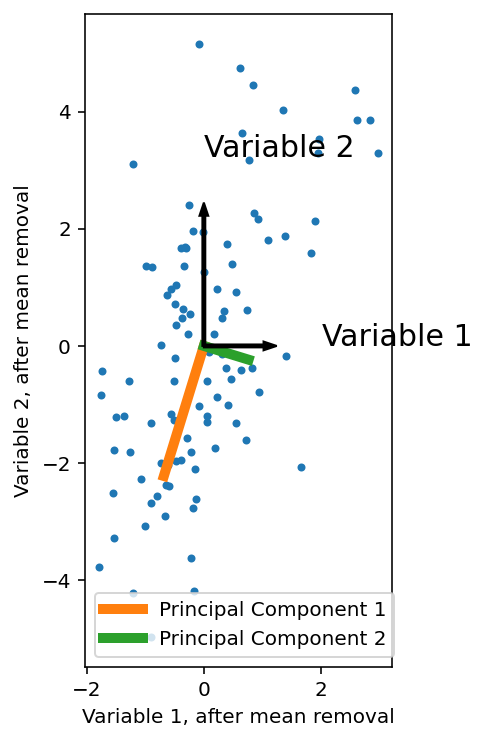

In [ ]:
## plot in original variable space
plt.figure(figsize=[6,6])
plt.plot(centered_bivariate[:,0],
         centered_bivariate[:,1],'.')

for i, (comp, std) in enumerate(zip(pca.components_, np.sqrt(pca.explained_variance_))):
    comp = comp * std
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Principal Component {i+1}", linewidth=5,
             color=f"C{i + 1}")

plt.arrow(0, 0,  std_bivariate[0], 0, width = 0.05,
          color='black',zorder = 2)
plt.text(std_bivariate[0]+1 ,0, 'Variable 1', size = 15)

plt.arrow(0, 0, 0, std_bivariate[1], width=0.05,
          color='black',zorder = 2)

plt.text(0, std_bivariate[1]+1, 'Variable 2',size = 15)

plt.gca().set(aspect='equal')

plt.xlabel('Variable 1, after mean removal')
plt.ylabel('Variable 2, after mean removal')
plt.legend(loc = 3)

### Trivariate Gaussian example

We addressed the biplot for 2 variables. How about we have 3 variables? Can we still visualize 3 variables in 2D?

In [ ]:
trivariate_Gaussian = np.random.multivariate_normal(np.array([0,1,2]), np.array([[1, 0.4, 1.5],
                                                                                 [1, 2, 1],
                                                                                 [1.5, 0.4 , 3]]), 100)

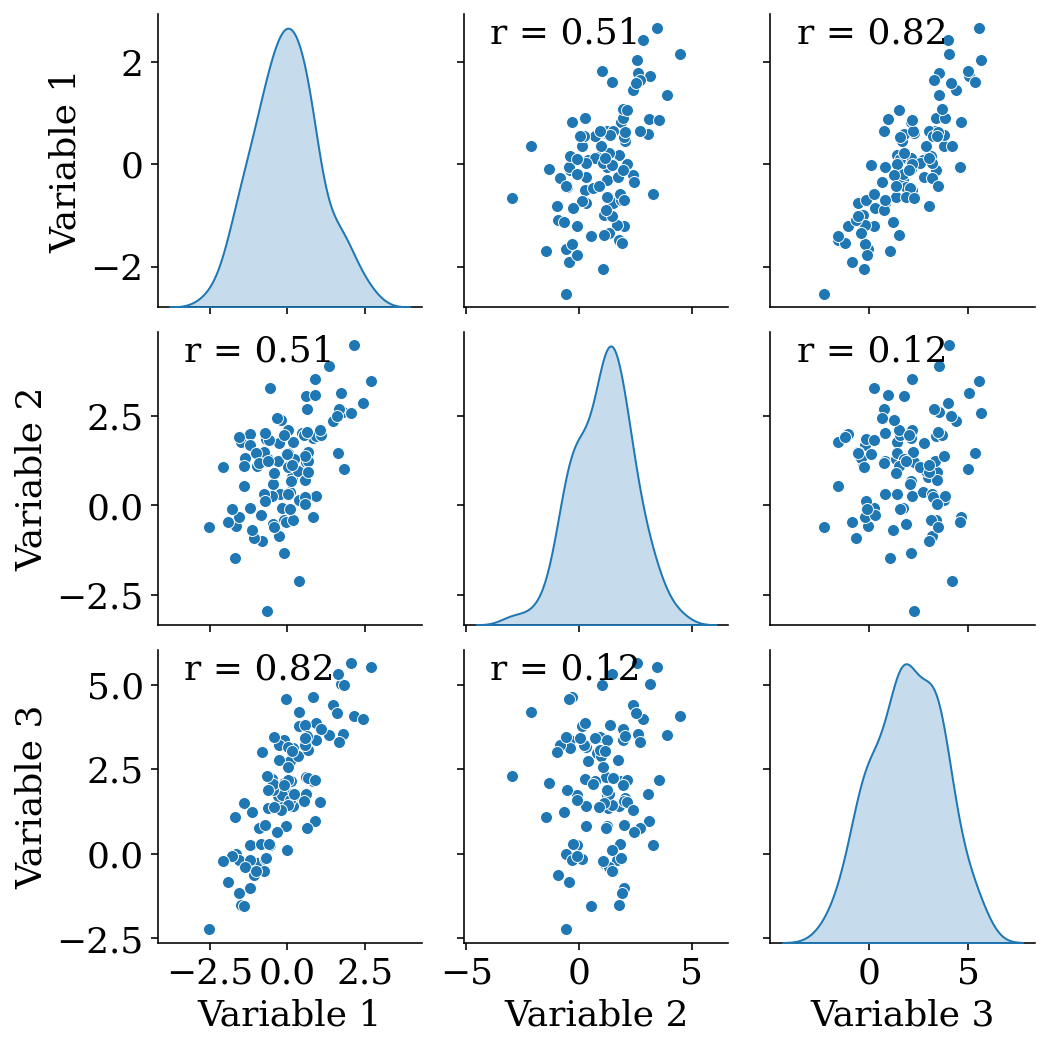

In [ ]:
matplotlib.rcParams.update({'font.size': 18})
trivariate_Gaussian_df = pd.DataFrame(trivariate_Gaussian, columns = ['Variable 1', 'Variable 2','Variable 3'])
g = sns.pairplot(trivariate_Gaussian_df, kind = 'scatter', diag_kind='kde')
g.map_lower(corrfunc)
g.map_upper(corrfunc)

Let's perform the rotation again:

*   Coordinates/scores after rotation: $T = XW $, is a N x D matrix

We can plot 3D samples on the first 2 coordinates $T(:,1)$ and $T(:,2)$:




In [ ]:
scaler = StandardScaler(with_std=False)
centered_trivariate =  scaler.fit_transform(trivariate_Gaussian)
std_trivariate = np.std(trivariate_Gaussian,axis = 0)

## PCA
pca = PCA(n_components=3)
pca.fit(trivariate_Gaussian)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

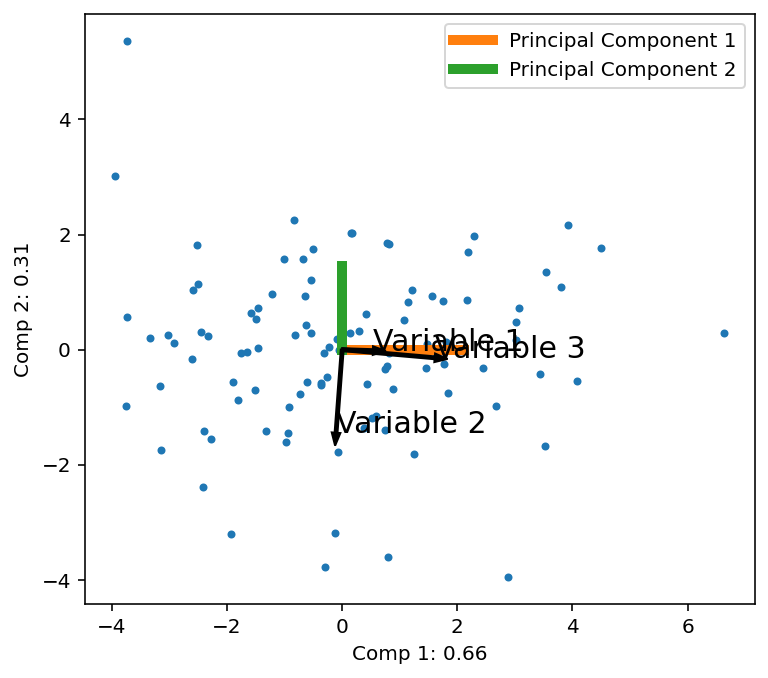

In [ ]:
# biplot for 3 variables, plot in principal component space
plt.figure(figsize=[6,6])
pc_scores = pca.transform(trivariate_Gaussian)

D = 3
comp_index = np.array([0,1])

plt.plot(pc_scores[:,comp_index[0]],
         pc_scores[:,comp_index[1]],'.')

plt.plot([0, np.sqrt(pca.explained_variance_[comp_index[0]])], [0, 0], linewidth=5,
          color=f"C{comp_index[0]+1}", label=f"Principal Component {comp_index[0]+1}")

plt.plot([0, 0], [0, np.sqrt(pca.explained_variance_[comp_index[1]])], linewidth=5,
          color=f"C{comp_index[1]+1}", label=f"Principal Component {comp_index[1]+1}")



for i in range(D):
    plt.arrow(0, 0,  pca.components_[comp_index[0],i]*std_trivariate[i],pca.components_[comp_index[1],i]*std_trivariate[i], width = 0.05,
            color='black',zorder = 2)

    plt.text(pca.components_[comp_index[0],i]*std_trivariate[i],pca.components_[comp_index[1],i]*std_trivariate[i], 'Variable '+str(i+1), size = 15, zorder = 20)

plt.gca().set(aspect='equal')
plt.xlabel('Comp '+str(comp_index[0]+1)+': '+str(np.round(pca.explained_variance_ratio_[comp_index[0]],2)))
plt.ylabel('Comp '+str(comp_index[1]+1)+': '+str(np.round(pca.explained_variance_ratio_[comp_index[1]],2)))

plt.legend()

In this biplot, we can still see all variables and all sample points. The first component explains 60% variance, the second component explains 35% variance. Only 5% variance left for the third component.

**How to interpret the biplot?**



*   Cosine of angle between variables **approximates** correlation between variables
*   Length of variable vector approximates standard deviation (square root of variance) of variable



Correlation matrix:

In [ ]:
## Empirical Correlation matrix, before rotation
pd.DataFrame(data=np.round(np.corrcoef(trivariate_Gaussian.T),4),
             index = ['Variable 1','Variable 2','Variable 3'],
             columns = ['Variable 1','Variable 2','Variable 3'])

,Variable 1,Variable 2,Variable 3
Variable 1,1.0000,-0.0801,0.9057
Variable 2,-0.0801,1.0000,-0.0485
Variable 3,0.9057,-0.0485,1.0000


Covariance matrix:

In [ ]:
## Empirical Covariance matrix, before rotation
pd.DataFrame(data=np.round(np.cov(trivariate_Gaussian.T),4),
             index = ['Variable 1','Variable 2','Variable 3'],
             columns = ['Variable 1','Variable 2','Variable 3'])

,Variable 1,Variable 2,Variable 3
Variable 1,1.2029,-0.1278,1.8463
Variable 2,-0.1278,2.1174,-0.1312
Variable 3,1.8463,-0.1312,3.4546


From the biplot, we can see the angle between Variable 1 and Variable 3 is very small, means that Variable 1 and Variable 3 are **positively correlated**. The length of variable 3 vector is longer than variable 1, means that variance of variable 3 > variance of variable 1.


Variable 2 vector is approximately orthogonal to Variable 1 and Variable 3, means variable 2 is not correlated to Variable 1&3.

Let's see another trivariate Gaussian example. How do you interpret the biplot? Why do Variable 1 and Variable 3 point opposite directions?

In [ ]:
trivariate_Gaussian2 = np.random.multivariate_normal(np.array([0,1,2]), np.array([[1, 0, -1.5],
                                                                                 [0, 2, 0],
                                                                                 [-1.5, 0 , 3]]), 100)

In [ ]:
scaler = StandardScaler(with_std=False)
centered_trivariate =  scaler.fit_transform(trivariate_Gaussian2)
std_trivariate = np.std(trivariate_Gaussian2,axis = 0)

## PCA
pca = PCA(n_components=3)
pca.fit(trivariate_Gaussian2)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

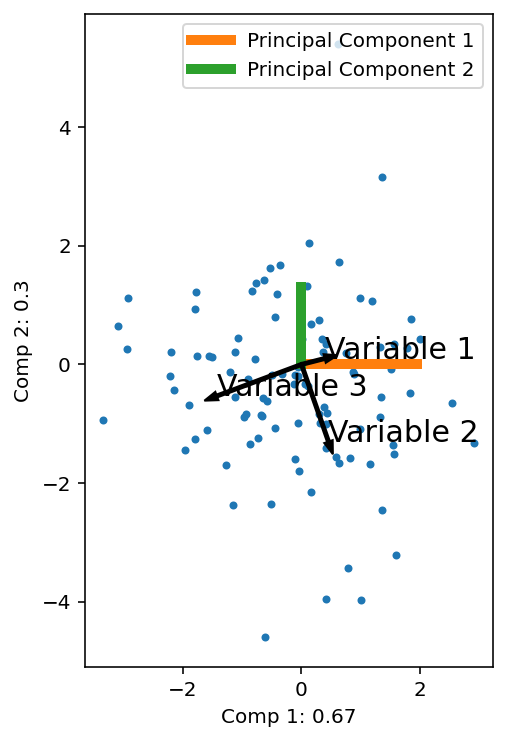

In [ ]:
# biplot for 3 variables, plot in principal component space
plt.figure(figsize=[6,6])
pc_scores = pca.transform(trivariate_Gaussian)

D = 3
comp_index = np.array([0,1])

plt.plot(pc_scores[:,comp_index[0]],
         pc_scores[:,comp_index[1]],'.')

plt.plot([0, np.sqrt(pca.explained_variance_[comp_index[0]])], [0, 0], linewidth=5,
          color=f"C{comp_index[0]+1}", label=f"Principal Component {comp_index[0]+1}")

plt.plot([0, 0], [0, np.sqrt(pca.explained_variance_[comp_index[1]])], linewidth=5,
          color=f"C{comp_index[1]+1}", label=f"Principal Component {comp_index[1]+1}")



for i in range(D):
    plt.arrow(0, 0,  pca.components_[comp_index[0],i]*std_trivariate[i],pca.components_[comp_index[1],i]*std_trivariate[i], width = 0.05,
            color='black',zorder = 2)

    plt.text(pca.components_[comp_index[0],i]*std_trivariate[i],pca.components_[comp_index[1],i]*std_trivariate[i], 'Variable '+str(i+1), size = 15, zorder = 20)

plt.gca().set(aspect='equal')
plt.xlabel('Comp '+str(comp_index[0]+1)+': '+str(np.round(pca.explained_variance_ratio_[comp_index[0]],2)))
plt.ylabel('Comp '+str(comp_index[1]+1)+': '+str(np.round(pca.explained_variance_ratio_[comp_index[1]],2)))

plt.legend()

In [ ]:
## Empirical Correlation matrix, before rotation
pd.DataFrame(data=np.round(np.corrcoef(trivariate_Gaussian2.T),4),
             index = ['Variable 1','Variable 2','Variable 3'],
             columns = ['Variable 1','Variable 2','Variable 3'])

,Variable 1,Variable 2,Variable 3
Variable 1,1.0000,0.2735,-0.8549
Variable 2,0.2735,1.0000,-0.2345
Variable 3,-0.8549,-0.2345,1.0000


Variable 1 and Variable 3 are **negatively correlated**.

### $D$ compositions example


Now we can get back to our geochemistry dataset with 22 elements. Here we do biplot on clr-transformation:

The level of Chromium (Cr).


*   Group 0: 0 ppb < [Cr] < 1 ppb
*   Group 1: 1 ppb < [Cr] < 2.5 ppb
*   Group 2: 2.5 ppb < [Cr] < 5 ppb
*   Group 3: 5 ppb < [Cr] < 10 ppb
*   Group 4:   [Cr] > 10 ppb



![variation_array.jpg](https://drive.google.com/uc?export=view&id=1WfXRNofBHlAyXY0-tCGAmYAWKaXhtVdQ)

Can you do the biplot interpretation from what we learnt in the trivariate example? Which elements are co-linear? Which element has the largest variance?

# Clustering analysis

## K-means clustering


Clustering is to divide a set of data into groups (clusters). Here we use the famous [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to illustrate how to cluster data using the K-means method.

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
## load iris data
iris = datasets.load_iris()
iris_dat = pd.DataFrame(data= np.c_[iris['data'], iris['target'], iris['target']],
                     columns= iris['feature_names'] + ['species']+['target'])
for i in range(3):
  iris_dat['species'][iris_dat['species']==i] = iris.target_names[i]
iris_dat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0.0
1,4.9,3.0,1.4,0.2,setosa,0.0
2,4.7,3.2,1.3,0.2,setosa,0.0
3,4.6,3.1,1.5,0.2,setosa,0.0
4,5.0,3.6,1.4,0.2,setosa,0.0




<img src='https://drive.google.com/uc?export=view&id=1d-p8CFtKGYLOOXRcuwaPWECrCtUkmwZT' width=80%>




The dataset consists of 150 samples from three Iris species (setosa, virginica and versicolor).
Each sample measures the length & width of petal and sepal respectively.

We want to cluster the dataset into 3 groups based on all the length & width values.

**Goal**: Each clustered subset should be more close to one iris spiece than the other clusters.

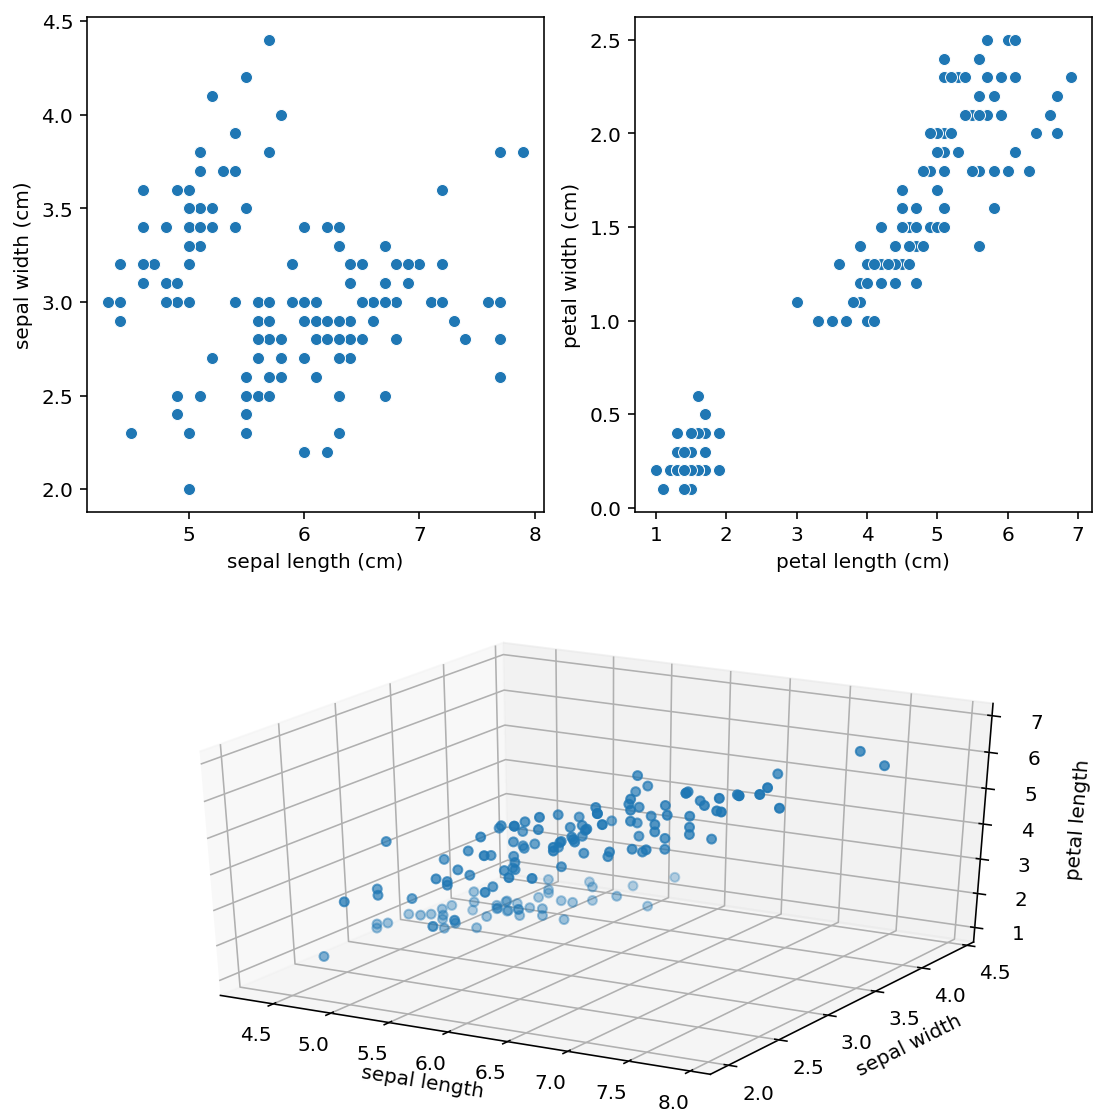

In [ ]:
## have a look at the iris data
fig = plt.figure(figsize=(9,10))
plt.subplot(221)

sns.scatterplot(data=iris_dat, x=iris_dat['sepal length (cm)'], y=iris_dat['sepal width (cm)'], sizes=70)
plt.subplot(222)
sns.scatterplot(data=iris_dat, x=iris_dat['petal length (cm)'], y=iris_dat['petal width (cm)'], sizes=70)

ax =fig.add_subplot(212, projection='3d')

ax.scatter(iris_dat['sepal length (cm)'], iris_dat['sepal width (cm)'], iris_dat['petal length (cm)'])
ax.set_xlabel('sepal length')
ax.zaxis.set_tick_params(labelsize=10)
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
# plt.suptitle('Raw sepal & petal data')
# plt.tight_layout()
plt.show()
# sns.scatterplot(data=iris_dat, x=iris_dat['sepal length (cm)'], y=iris_dat['petal width (cm)'], sizes=70)
# plt.show()

Will you observe the 3 iris species ('setosa', 'versicolor', 'virginica') from the length/width measurements?

**Perform K-means clustering**

How K-means clustering works:

K-means clustering partitions n measurements (n=150 with iris dataset) in to k clusters.
Each cluster is defined by its center (mean of the cluster, therefore there are k number of means). The measurement point in each particular cluster will have closest distance to its center that any other cluster centers.



After given initial k means, the method will find the best center by iteratively alternating between:
 * (1) assign each measurement point to a cluster based its minimum distance to the current centers.
 * (2) recalculate centers (means) based on the current assigned measurements to each cluster.

To perform K-means clustering, it is first required to assign cluster number (n_cluster). Here, we set n_cluster = 3 beacuse there are 3 iris species.

In [ ]:
# define cluster number and perform k-means clustering with the iris data
cluster_num = 3
## length and width measurement values: iris.data
kmeans = KMeans(n_clusters=cluster_num, random_state=10).fit(iris.data)
## get clustering labels
iris_dat['kmeans_label'] = kmeans.labels_
## get cluster centers
cluster_center = kmeans.cluster_centers_

Below we plot cluster labels and centers (marked as black-cross) after performing k-means clustering on the iris dataset.


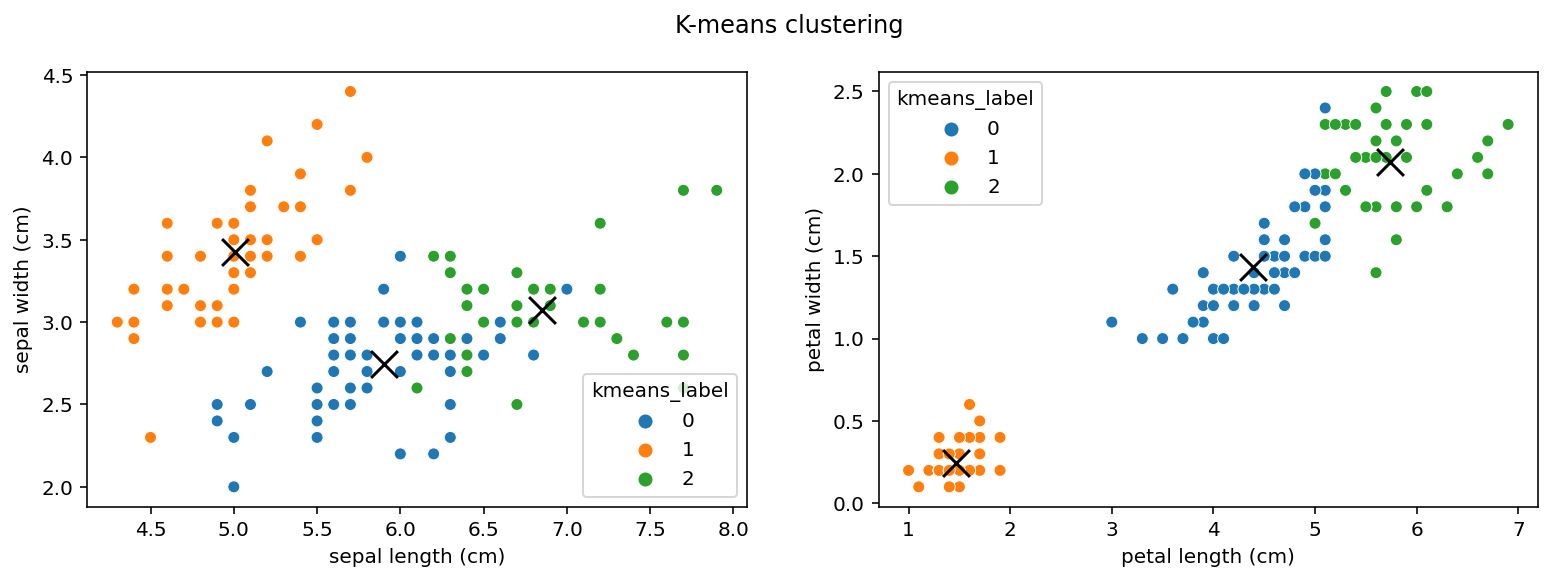

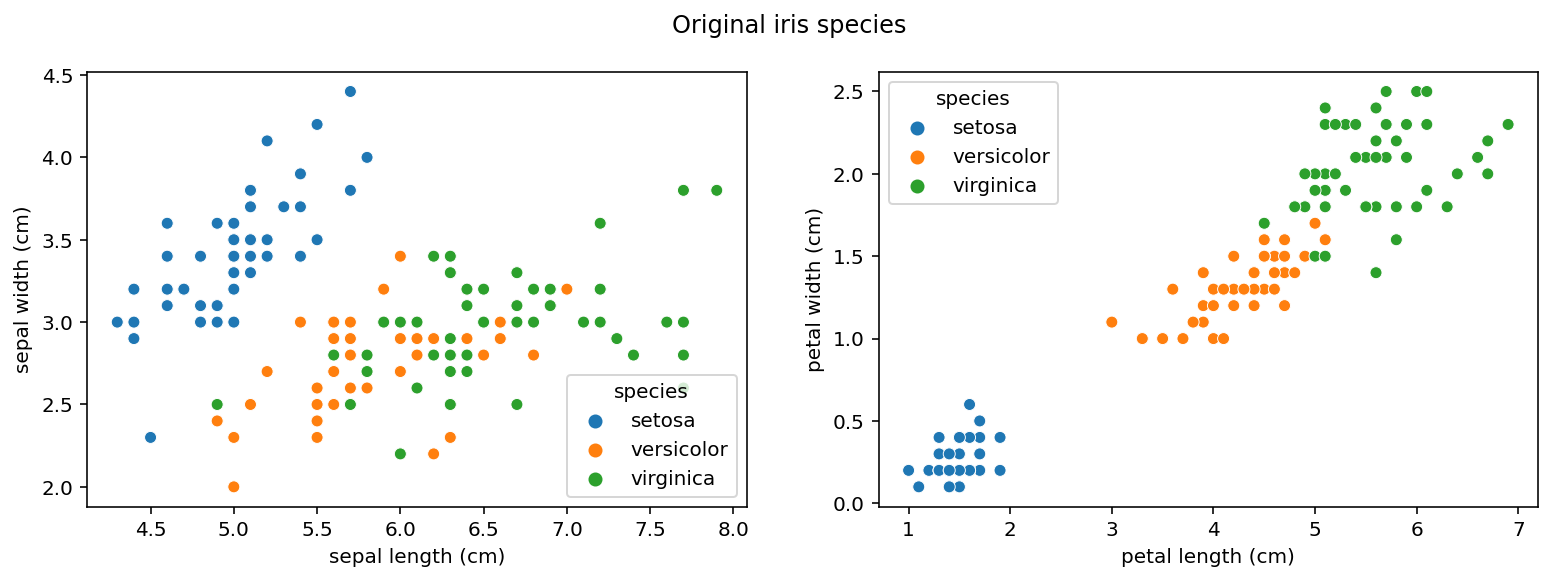

In [ ]:
plt.figure(figsize=(13,4))
## plot the cluster labels
plt.subplot(121)
sns.scatterplot(data=iris_dat, x=iris_dat['sepal length (cm)'], y=iris_dat['sepal width (cm)'], sizes=70,
                hue="kmeans_label", palette="tab10")
plt.scatter(cluster_center[:,0],cluster_center[:,1],  marker = 'x', s=180, c='k')
plt.subplot(122)
sns.scatterplot(data=iris_dat, x=iris_dat['petal length (cm)'], y=iris_dat['petal width (cm)'], sizes=70,
                hue="kmeans_label", palette="tab10")
plt.scatter(cluster_center[:,2],cluster_center[:,3],  marker = 'x', s=180, c='k')

plt.suptitle('K-means clustering')
plt.show()
## plot the original iris species
plt.figure(figsize=(13,4))
plt.subplot(121)
sns.scatterplot(data=iris_dat, x=iris_dat['sepal length (cm)'], y=iris_dat['sepal width (cm)'], sizes=70,
                hue="species", palette="tab10")

plt.subplot(122)
sns.scatterplot(data=iris_dat, x=iris_dat['petal length (cm)'], y=iris_dat['petal width (cm)'], sizes=70,
                hue="species", palette="tab10")
plt.suptitle('Original iris species')

plt.show()


Compare compare the K-means clustered groups to the original species groups. See how different they are.

## [Advanced] Silhouette index to determine cluster number

In most real clustering applications, we don't know the optimal cluster numbers beforehand. We can use silhouette analysis to determine the number of clusters.

Silhouette index measures the distance between from each sample is to its neighboring clusters. Let $a^{(l)}$ be the average distance of a point $X^{(l)}$ to all other points in the same cluster. It measures how well the point $X^{(l)}$ is assigned to its cluster (the smaller, the better).

Let $b^{(l)}$ represent the minimum of the average distance between $X^{(l)}$ and the points in different clusters:

$$b(l) = \min_{k} d(X^{(l)}, c_k)$$

$d(X^{(l)}, c_k)$ is the avarage distance between $X^{(l)}$ and all the points in cluster $c_k$ ($X^{(l)}$ does not belong to $c_k$).

The silhouette index is then defined as:

$$s(l) = \frac{b(l) - a(l)}{\max\{a(l),b(l)\}}$$

* If $s(l)$ is close to 1, it means the data is well clustered.
* If $s(l)$  is close to zero, the data point is very close to neighboring clusters.
* Negative $s(l)$  means that the samples might be assigned to a wrong cluster.  

We want all points to have a high $s(l)$  value, because it means the clustering configuration is appropriate.


Let's use silhouette indext to decide the optimal cluster number for this dataset

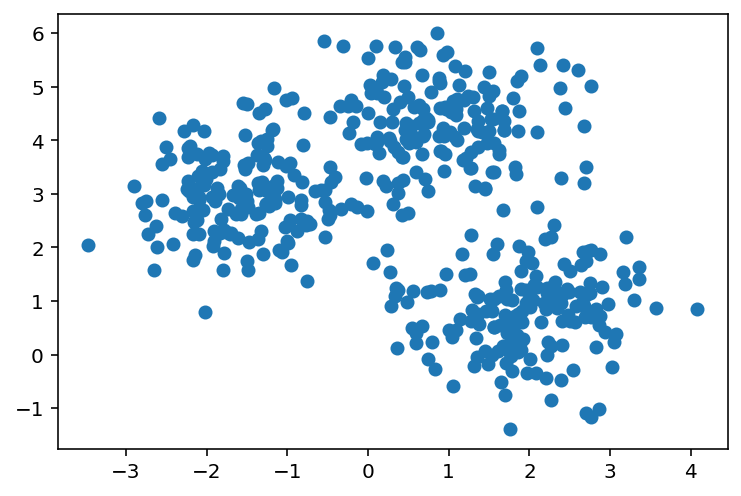

In [ ]:
# generate test data
from sklearn.datasets import make_blobs
cls_data, cls= make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=0.75, shuffle=True, random_state=0)
plt.scatter(cls_data[:,0], cls_data[:,1])
plt.show()


Below we calculate silhouette index for the dataset and plot them. The silhouette plot will show how each point in one cluster is close to points in the neighboring clusters.


In [ ]:
## import silhouette index caculation function.
! git clone https://github.com/sdyinzhen/GS240_resources
import sys
sys.path.append('/content/GS240_resources/kmeans')
from silhouette_index import *

fatal: destination path 'GS240_resources' already exists and is not an empty directory.


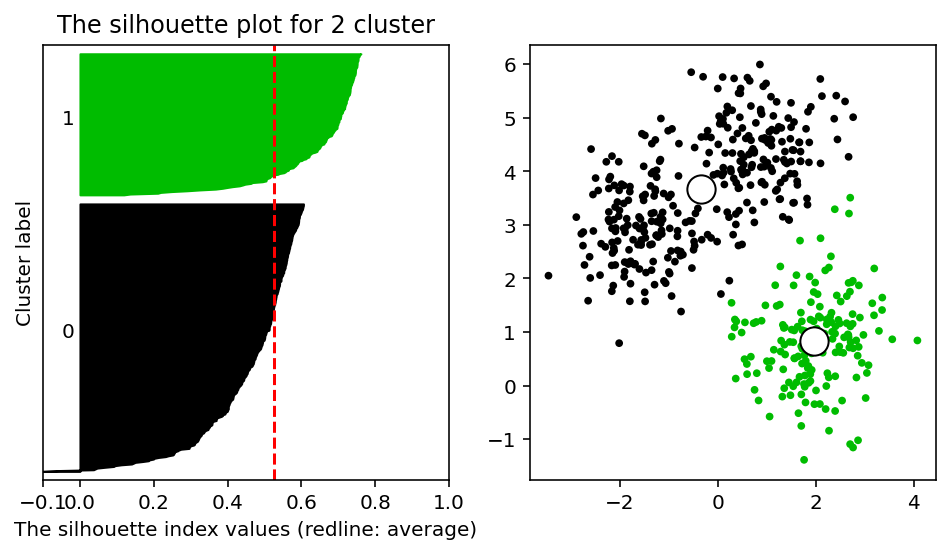

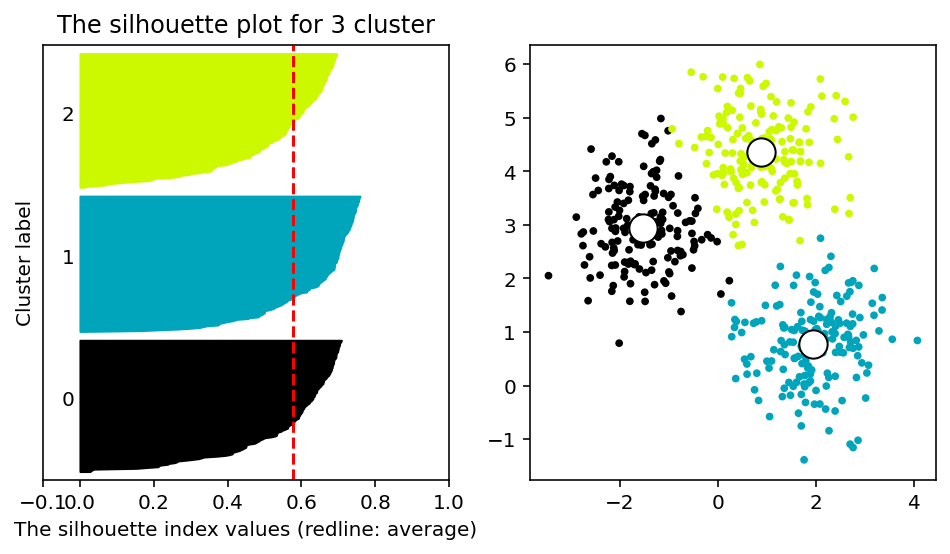

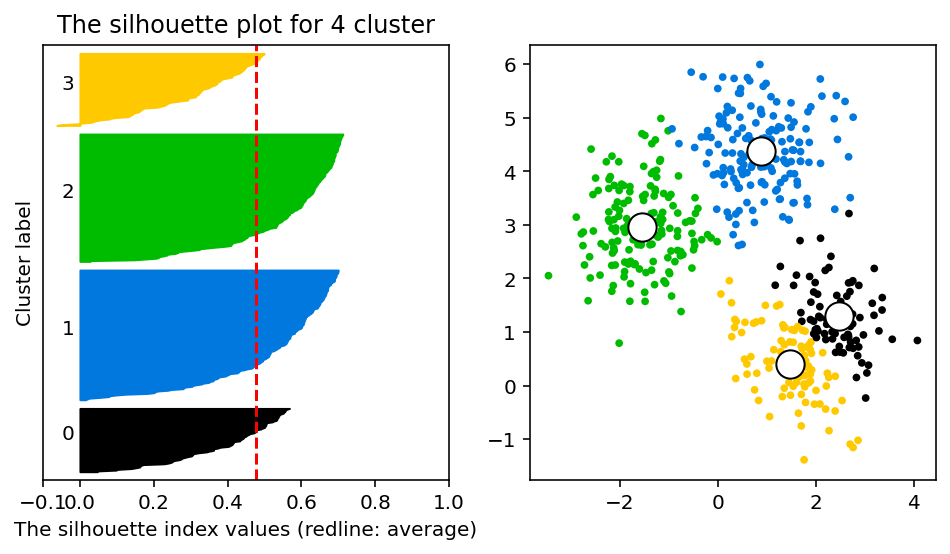

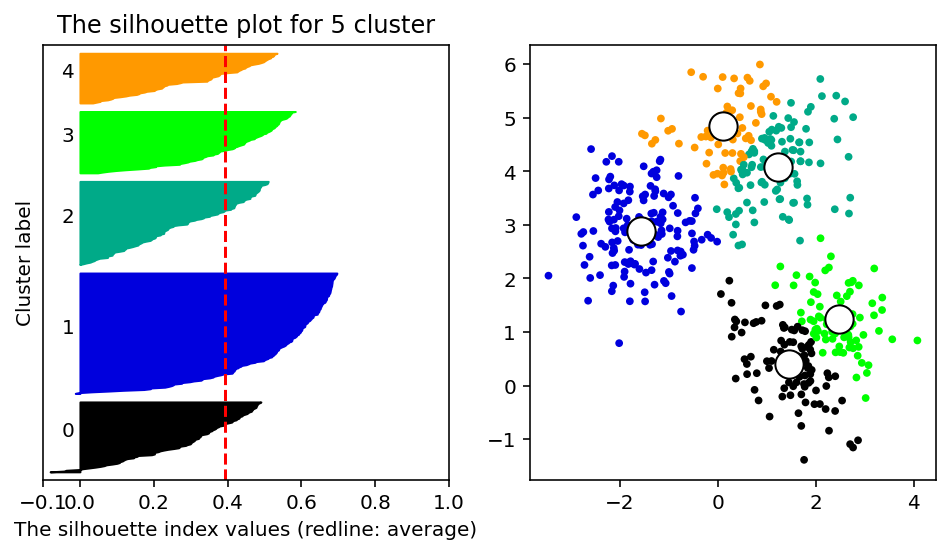

In [ ]:
# import silhouette index
ave_silhouette_index = silhouette_index(cls_data, test_clusters=[2,3,4,5])

It shows with n_cluster=3, all the clusters have the highest $s(l)$. 3 is best cluster number for this dataset.

We can use the average of silhouette index for different number of clusters. The best clustering configuration should have maximum average silhouette index. In this case, the average silhouette index is maximum when cluster number is 3.

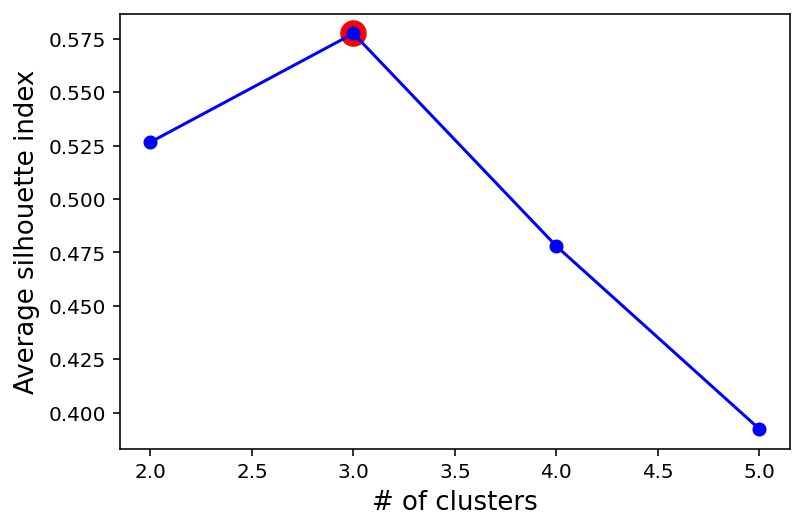

In [ ]:
test_clusters=[2,3,4,5]
plt.plot(test_clusters, ave_silhouette_index, 'bo-')
plt.scatter(3, max(ave_silhouette_index), c='r', s=150)
plt.xlabel('# of clusters', fontsize = 13)
plt.ylabel('Average silhouette index', fontsize = 13)
plt.show()